In [1]:
pip install matplotlib


                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB 1.4 MB/s eta 0:00:06
                                              0.0/7.6 MB 653.6 kB/s eta 0:00:12
                                              0.1/7.6 MB 819.2 kB/s eta 0:00:10
                                              0.1/7.6 MB 774.0 kB/s eta 0:00:10
     -                                        0.2/7.6 MB 1.1 MB/s eta 0:00:07
     -                                        0.3/7.6 MB 1.0 MB/s eta 0:00:08
     -                                        0.4/7.6 MB 1.1 MB/s eta 0:00:07
     --                                       0.5/7.6 MB 1.2 MB/s eta 0:00:06
     --                                       0.5/7.6 MB 1.3 MB/s eta 0:00:06
     ---                                      0.7/7.6 MB 1.4 MB/s eta 0:00:05
     ----                                     0.8/7.6 MB 1.7 MB/s eta 0:00:05
     ----                                     1.0/7.6 MB 1.7 MB/

In [2]:
pip install seaborn

                                              0.0/293.3 kB ? eta -:--:--
     ----                                    30.7/293.3 kB 1.4 MB/s eta 0:00:01
     ---------                             71.7/293.3 kB 991.0 kB/s eta 0:00:01
     ---------------                      122.9/293.3 kB 901.1 kB/s eta 0:00:01
     -----------------------------          225.3/293.3 kB 1.3 MB/s eta 0:00:01
     -------------------------------------  286.7/293.3 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import seaborn as sns
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "1234",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [4]:
con = PostgresConnection().getConnection()

successfully connected to database


# Q1: Find the division wise total_sale_price joining fact table and respective dimension table

In [44]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "GROUP BY CUBE(s.division) " \
                "ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [45]:
records

[('BARISAL', Decimal('7520343.75')),
 ('CHITTAGONG', Decimal('19763595.00')),
 ('DHAKA', Decimal('40764619.75')),
 ('KHULNA', Decimal('11311610.50')),
 ('RAJSHAHI', Decimal('12099196.00')),
 ('RANGPUR', Decimal('8429836.50')),
 ('SYLHET', Decimal('5512234.25')),
 (None, Decimal('105401435.75'))]

In [46]:
df_q1 = pd.DataFrame(records, columns=['division', 'sales'])
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25
7,None,105401435.75


In [47]:
df_q1 =df_q1.drop(7)

In [48]:
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [44]:
def changetype(x):
    x['sales']=x['sales'].astype('float64')  

In [50]:
changetype(df_q1)

In [51]:
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [52]:
df_q1=df_q1.set_index(['division'])
df_q1

,sales
division,
BARISAL,7520343.75
CHITTAGONG,19763595.00
DHAKA,40764619.75
KHULNA,11311610.50
RAJSHAHI,12099196.00
RANGPUR,8429836.50
SYLHET,5512234.25


<Axes: ylabel='sales'>

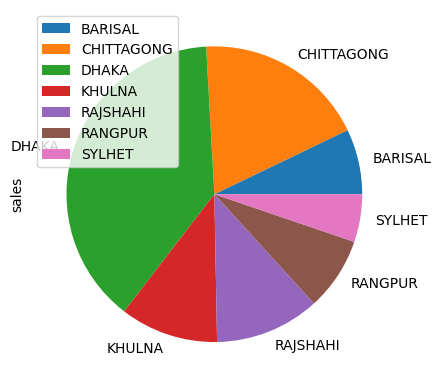

In [53]:
df_q1.plot.pie(y='sales')

<Axes: xlabel='division'>

<Figure size 1000x500 with 0 Axes>

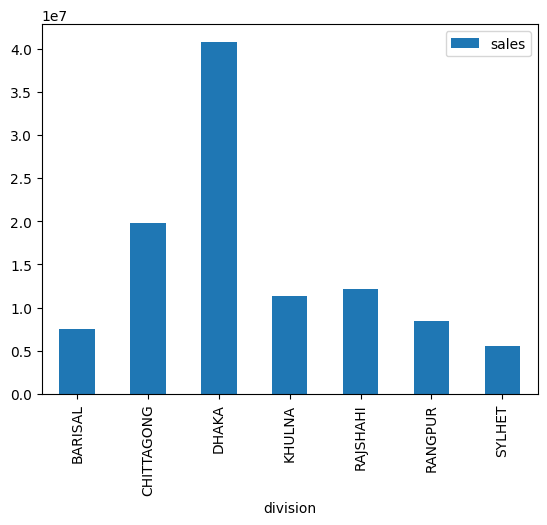

In [54]:
plt.figure(figsize=(10,5))
df_q1.plot.bar(y='sales')

In [55]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.time_dim s on s.time_key=t.time_key " \
                "GROUP BY CUBE(s.year) " \
                "ORDER BY s.year "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [56]:
records

[(2014, Decimal('14334731.25')),
 (2015, Decimal('15095720.25')),
 (2016, Decimal('14976508.25')),
 (2017, Decimal('15015806.00')),
 (2018, Decimal('15108197.25')),
 (2019, Decimal('14949510.25')),
 (2020, Decimal('15037190.25')),
 (2021, Decimal('883772.25')),
 (None, Decimal('105401435.75'))]

# Q1. Find the districtwise total_sale_price joining fact table and respective dimension table

In [8]:
#district-wise
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.district, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "GROUP BY CUBE(s.district) " \
                "ORDER BY s.district "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [9]:
records

[('BAGERHAT', Decimal('1307651.00')),
 ('BANDARBAN', Decimal('995360.75')),
 ('BARGUNA', Decimal('869041.00')),
 ('BARISAL', Decimal('2897237.75')),
 ('BHOLA', Decimal('1012205.75')),
 ('BOGRA', Decimal('1716452.75')),
 ('BRAHMANBARIA', Decimal('1328234.25')),
 ('CHANDPUR', Decimal('1153276.75')),
 ('CHAPAI NABABGANJ', Decimal('739447.50')),
 ('CHITTAGONG', Decimal('7292985.50')),
 ('CHUADANGA', Decimal('563909.75')),
 ('COMILLA', Decimal('2286898.25')),
 ("COX'S BAZAR", Decimal('1188128.75')),
 ('DHAKA', Decimal('23597621.00')),
 ('DINAJPUR', Decimal('1871005.75')),
 ('FARIDPUR', Decimal('1287383.75')),
 ('FENI', Decimal('847873.50')),
 ('GAIBANDHA', Decimal('997077.75')),
 ('GAZIPUR', Decimal('722286.25')),
 ('GOPALGANJ', Decimal('731312.75')),
 ('HABIGANJ', Decimal('1153998.00')),
 ('JAMALPUR', Decimal('1009760.00')),
 ('JESSORE', Decimal('1132590.50')),
 ('JHALOKATI', Decimal('570807.25')),
 ('JHENAIDAH', Decimal('869991.25')),
 ('JOYPURHAT', Decimal('735378.50')),
 ('KHAGRACHHARI'

In [10]:
df_q1 = pd.DataFrame(records, columns=['district', 'sales'])
df_q1 = df_q1.set_index(['district'])
df_q1

,sales
district,
BAGERHAT,1307651.00
BANDARBAN,995360.75
BARGUNA,869041.00
BARISAL,2897237.75
BHOLA,1012205.75
...,...
SUNAMGANJ,1593774.00
SYLHET,1727717.25
TANGAIL,1774650.25


In [13]:
changetype(df_q1)

<Axes: ylabel='district'>

<Figure size 2000x2000 with 0 Axes>

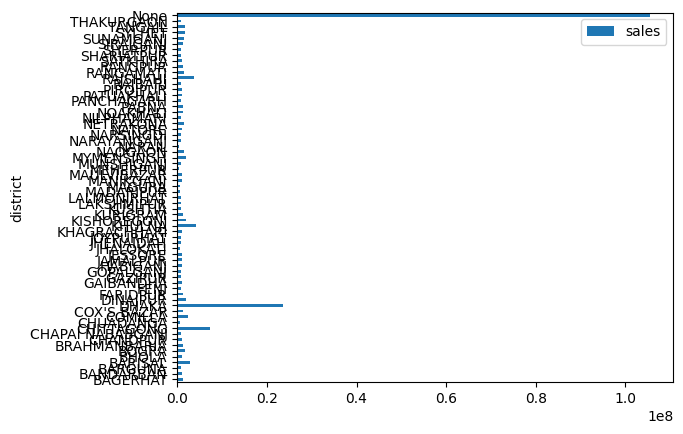

In [15]:
plt.figure(figsize=(20,20))
df_q1.plot.barh(y='sales')

# Q1. Find the yearwise total_sale_price joining fact table and respective dimension table

In [92]:
#year-wise
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.time_dim s on s.time_key=t.time_key " \
                "GROUP BY CUBE(s.year) " \
                "ORDER BY s.year "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [93]:
records

[(2014, Decimal('14334731.25')),
 (2015, Decimal('15095720.25')),
 (2016, Decimal('14976508.25')),
 (2017, Decimal('15015806.00')),
 (2018, Decimal('15108197.25')),
 (2019, Decimal('14949510.25')),
 (2020, Decimal('15037190.25')),
 (2021, Decimal('883772.25')),
 (None, Decimal('105401435.75'))]

In [96]:
df_q1 = pd.DataFrame(records, columns=['year', 'sales'])
df_q1

,year,sales
0,2014.0,14334731.25
1,2015.0,15095720.25
2,2016.0,14976508.25
3,2017.0,15015806.00
4,2018.0,15108197.25
5,2019.0,14949510.25
6,2020.0,15037190.25
7,2021.0,883772.25
8,NaN,105401435.75


In [97]:
df_q1=df_q1.drop(8)
df_q1=df_q1.set_index(['year'])
changetype(df_q1)
df_q1

,sales
year,
2014.0,14334731.25
2015.0,15095720.25
2016.0,14976508.25
2017.0,15015806.00
2018.0,15108197.25
2019.0,14949510.25
2020.0,15037190.25
2021.0,883772.25


<Axes: xlabel='year'>

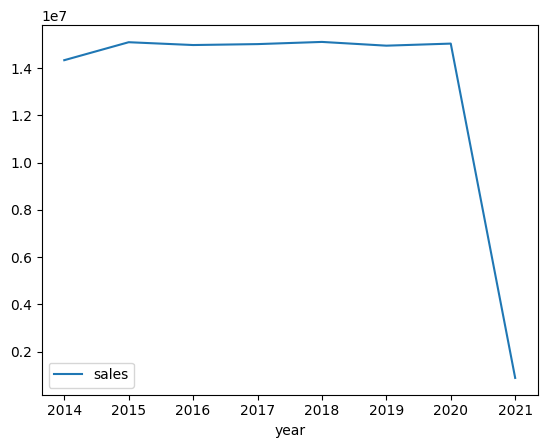

In [98]:
df_q1.plot(y=['sales'])

# Q2. Find the customerwise total_sale_price joining fact table and respective dimension table

In [24]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT c.name, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.customer_dim c on c.customer_key=t.customer_key " \
                "GROUP BY CUBE(c.name) " \
                "ORDER BY c.name "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [25]:
records

[('-', Decimal('20643.50')),
 ('aafreen fatima', Decimal('11174.75')),
 ('aafrin', Decimal('22136.75')),
 ('aafrin @ dolly', Decimal('23529.75')),
 ('aaftaab husan', Decimal('9682.00')),
 ('aakanksha', Decimal('11469.00')),
 ('aaliya', Decimal('21663.25')),
 ('aamina', Decimal('12649.25')),
 ('aamir', Decimal('10134.00')),
 ('aamir hussain', Decimal('10892.50')),
 ('aamod & pramod', Decimal('12280.25')),
 ('aamrin jahan', Decimal('11622.00')),
 ('aanamika misra', Decimal('8929.25')),
 ('aanchal', Decimal('35703.50')),
 ('aanik with her son', Decimal('8568.25')),
 ('aansi devi', Decimal('9909.00')),
 ('aanya @ china', Decimal('11443.50')),
 ('aaradhana @ priyanka', Decimal('11469.25')),
 ('aarifa bano', Decimal('11295.75')),
 ('aarifun bivi', Decimal('13139.25')),
 ('aarti', Decimal('661675.25')),
 ('aarti @ kajal', Decimal('12108.50')),
 ('aarti @ noni', Decimal('12335.50')),
 ('aarti bunkar', Decimal('13661.75')),
 ('aarti devi', Decimal('26537.00')),
 ('aarti diwakar', Decimal('10892

In [26]:
df_q1 = pd.DataFrame(records, columns=['year', 'sales'])
df_q1=df_q1.set_index(['year'])
changetype(df_q1)
df_q1

,sales
year,
-,2.064350e+04
aafreen fatima,1.117475e+04
aafrin,2.213675e+04
aafrin @ dolly,2.352975e+04
aaftaab husan,9.682000e+03
...,...
मन्जू,1.057575e+04
माया,9.862500e+03
सरोज,1.128000e+04


# Q2. Find the bankwise total_sale_price joining fact table and respective dimension table

In [40]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT t.bank_name, SUM(f.total_price) " \
              "FROM ecomdb_star_schema.fact_table f " \
              "JOIN ecomdb_star_schema.trans_dim t on t.payment_key=f.payment_key " \
                "GROUP BY CUBE(t.bank_name) " \
                "ORDER BY t.bank_name "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [41]:
records

[('AB Bank Limited', Decimal('2728515.50')),
 ('Bangladesh Commerce Bank Limited', Decimal('2730999.25')),
 ('Bank Asia Limited', Decimal('2687142.75')),
 ('Bengal Commercial Bank Ltd', Decimal('2704554.25')),
 ('Bkash', Decimal('2689352.50')),
 ('BRAC Bank Limited', Decimal('2705795.75')),
 ('Citizens Bank Limited', Decimal('2723215.25')),
 ('City Bank Limited', Decimal('2713952.50')),
 ('Community Bank Bangladesh Limited', Decimal('2685751.50')),
 ('Dhaka Bank Limited', Decimal('2728366.00')),
 ('Dutch-Bangla Bank Limited', Decimal('2692435.25')),
 ('Eastern Bank Limited', Decimal('2687182.25')),
 ('IFIC Bank Limited', Decimal('2699759.75')),
 ('Jamuna Bank Limited', Decimal('2689886.50')),
 ('Meghna Bank Limited', Decimal('2700528.50')),
 ('Mercantile Bank Limited', Decimal('2676578.50')),
 ('Midland Bank Limited', Decimal('2688430.25')),
 ('Modhumoti Bank Limited', Decimal('2715279.00')),
 ('Mutual Trust Bank Limited', Decimal('2670030.50')),
 ('Nagad', Decimal('2699554.50')),
 ('N

In [46]:
df_q1 = pd.DataFrame(records, columns=['bank_name', 'sales'])
df_q1

,bank_name,sales
0,AB Bank Limited,2728515.50
1,Bangladesh Commerce Bank Limited,2730999.25
2,Bank Asia Limited,2687142.75
3,Bengal Commercial Bank Ltd,2704554.25
4,Bkash,2689352.50
5,BRAC Bank Limited,2705795.75
6,Citizens Bank Limited,2723215.25
7,City Bank Limited,2713952.50
8,Community Bank Bangladesh Limited,2685751.50
9,Dhaka Bank Limited,2728366.00


In [47]:
df_q1=df_q1.drop(39)
df_q1 = df_q1.set_index(['bank_name'])
changetype(df_q1)

<Axes: xlabel='bank_name'>

<Figure size 2000x2000 with 0 Axes>

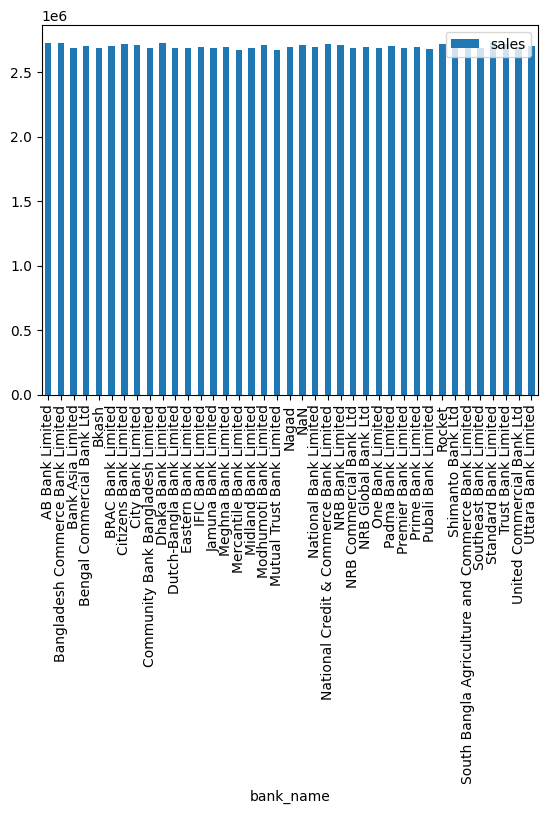

In [52]:
plt.figure(figsize=(20,20))
df_q1.plot.bar(y='sales')

# Q2. Find the transaction(cash/online) wise total_sale_price joining fact table and respective dimension table

In [35]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT t.trans_type, SUM(f.total_price) " \
              "FROM ecomdb_star_schema.fact_table f " \
              "JOIN ecomdb_star_schema.trans_dim t on t.payment_key=f.payment_key " \
                "GROUP BY CUBE(t.trans_type) " \
                "ORDER BY t.trans_type "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [36]:
records

[('card', Decimal('94583038.50')),
 ('cash', Decimal('2708515.75')),
 ('mobile', Decimal('8109881.50')),
 (None, Decimal('105401435.75'))]

In [37]:
df_q1 = pd.DataFrame(records, columns=['trans_type', 'sales'])
df_q1 = df_q1.set_index(['trans_type'])
changetype(df_q1)
df_q1

,sales
trans_type,
card,9.458304e+07
cash,2.708516e+06
mobile,8.109882e+06
None,1.054014e+08


<Axes: ylabel='sales'>

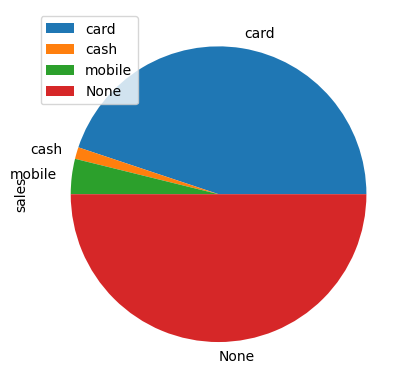

In [38]:
df_q1.plot.pie(y='sales')

# Q3. Total sales in Barisal

In [40]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key AND s.division = 'BARISAL' " \
                "GROUP BY CUBE(s.division) " \
                "ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('BARISAL', Decimal('7520343.75')), (None, Decimal('7520343.75'))]

In [49]:
df_q3 = pd.DataFrame(records, columns=['division', 'sales'])
changetype(df_q3)
df_q3

,division,sales
0,BARISAL,7520343.75
1,None,7520343.75


In [50]:
df_q3 =df_q3.drop(1)
df_q3

,division,sales
0,BARISAL,7520343.75


# Q4. Total sales in 2015

In [51]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.time_dim s on s.time_key=t.time_key AND s.year = 2015 " \
                "GROUP BY CUBE(s.year) " \
                "ORDER BY s.year "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[(2015, Decimal('15095720.25')), (None, Decimal('15095720.25'))]

In [52]:
df_q4 = pd.DataFrame(records, columns=['year', 'sales'])
changetype(df_q4)
df_q4

,year,sales
0,2015.0,15095720.25
1,NaN,15095720.25


In [53]:
df_q4 =df_q4.drop(1)
df_q4

,year,sales
0,2015.0,15095720.25


# Q5. Total sales of Barisal in 2015

In [58]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, t.year, SUM(fact.total_price) " \
              "FROM ecomdb_star_schema.fact_table fact " \
              "JOIN ecomdb_star_schema.time_dim t on fact.time_key=t.time_key " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=fact.store_key " \
              "WHERE t.year = 2015 AND s.division = 'BARISAL' " \
              "GROUP BY CUBE(t.year, s.division)"
                
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('BARISAL', 2015, Decimal('1076902.75')),
 (None, 2015, Decimal('1076902.75')),
 (None, None, Decimal('1076902.75')),
 ('BARISAL', None, Decimal('1076902.75'))]

In [67]:
df_q5 = pd.DataFrame(records, columns=['division', 'year', 'sales'])
changetype(df_q5)
df_q5

,division,year,sales
0,BARISAL,2015.0,1076902.75
1,None,2015.0,1076902.75
2,None,NaN,1076902.75
3,BARISAL,NaN,1076902.75


In [79]:
df_q5.iloc[0:1]

,division,year,sales
0,BARISAL,2015.0,1076902.75


# Q6. For each store(item supplier), what are the top three products offered that are most often purchased?

In [110]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.store_key, it.item_name, SUM(fact.quantity) " \
              "FROM ecomdb_star_schema.fact_table fact " \
              "JOIN ecomdb_star_schema.item_dim it on fact.item_key=it.item_key " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=fact.store_key " \
              "GROUP BY CUBE(s.store_key, it.item_name)"  \
              "ORDER BY s.store_key ASC, SUM(fact.quantity) DESC "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('S0001', None, Decimal('8169')),
 ('S0001', 'Pepsi - 12 oz cans', Decimal('92')),
 ('S0001', 'Muscle Milk Protein Shake Van. 11oz', Decimal('90')),
 ('S0001', 'Hefty Supreme Foam Plates 6 inch', Decimal('78')),
 ('S0001', 'Waterloo Sparkling Lime 12oz', Decimal('70')),
 ('S0001', 'Njoy Sugar Canister 22 oz', Decimal('69')),
 ('S0001', 'Vita Coconut Water 10oz ', Decimal('68')),
 ('S0001', 'Muscle Milk Protein Shake Strbry. 11oz', Decimal('67')),
 ('S0001', 'Sprite - 12 oz cans', Decimal('64')),
 ('S0001', 'Cheez It White Cheddar 1.5 oz', Decimal('63')),
 ('S0001', 'Sargento Bal. Breaks (fruit, nut, cheese)', Decimal('62')),
 ('S0001', 'Dixie Perfecttouch Paper Cups 12oz', Decimal('61')),
 ('S0001', 'Hershey Chocoalte Minatures Assort.', Decimal('60')),
 ('S0001', 'A&W Root Beer - 12 oz cans', Decimal('60')),
 ('S0001', 'Dark Chocolate Mint Patties', Decimal('60')),
 ('S0001', 'Large Trash Bags Black 33 gal', Decimal('59')),
 ('S0001', 'Nature Valley Sweet/Salty Almond Bars      ', De

In [111]:
df_q6 = pd.DataFrame(records, columns=['store_key', 'item_name', 'quantity'])
df_q6

,store_key,item_name,quantity
0,S0001,None,8169
1,S0001,Pepsi - 12 oz cans,92
2,S0001,Muscle Milk Protein Shake Van. 11oz,90
3,S0001,Hefty Supreme Foam Plates 6 inch,78
4,S0001,Waterloo Sparkling Lime 12oz,70
...,...,...,...
188095,None,Dole Fruit in Gel Cups 4.3 oz,21818
188096,None,La Croix Sparkling Orange 12 oz,21817
188097,None,Hershey Factory Favorites Mix,21741
188098,None,Monster Java 15 oz,21698


In [112]:
df_q6 = df_q6.dropna()
df_q6

,store_key,item_name,quantity
1,S0001,Pepsi - 12 oz cans,92
2,S0001,Muscle Milk Protein Shake Van. 11oz,90
3,S0001,Hefty Supreme Foam Plates 6 inch,78
4,S0001,Waterloo Sparkling Lime 12oz,70
5,S0001,Njoy Sugar Canister 22 oz,69
...,...,...,...
187835,S0099,Kind Bars Mini Variety Pack 0.7 oz,5
187836,S0099,Paper Plates 8.5 inch Ultra Strong,4
187837,S0099,Fuze Iced Tea,4
187838,S0099,Pringles Snak Stacks Variety,3


In [113]:
top_items = df_q6.groupby('store_key').head(3)
top_items

,store_key,item_name,quantity
1,S0001,Pepsi - 12 oz cans,92
2,S0001,Muscle Milk Protein Shake Van. 11oz,90
3,S0001,Hefty Supreme Foam Plates 6 inch,78
259,S0002,Planters Nut-trition 1.5 oz,83
260,S0002,Altoids Small Packs Variety,80
...,...,...,...
187322,S0098,Cliff Builders Protein Bar Variety Pack,84
187323,S0098,Pepsi - 12 oz cans,79
187581,S0099,Pepsi - 12 oz cans,93
187582,S0099,Diet Coke - 12 oz cans,87


# Q7. What products have been sold through card or mobile since X days?

In [5]:
days = input("Input the number of days: ")

Input the number of days: 1400


In [6]:
days = int(days)

In [18]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT i.item_name, tr.trans_type " \
              "FROM ecomdb_star_schema.fact_table fact " \
              "JOIN ecomdb_star_schema.trans_dim tr on fact.payment_key=tr.payment_key " \
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=fact.item_key " \
              "JOIN ecomdb_star_schema.time_dim t on t.time_key=fact.time_key " \
              "WHERE (tr.trans_type = 'card' OR tr.trans_type = 'mobile') " \
              "AND t.date BETWEEN (CURRENT_DATE - INTERVAL '%s day') AND CURRENT_DATE " \
              "GROUP BY CUBE(i.item_name, tr.trans_type) " \
              "ORDER BY i.item_name, tr.trans_type "
cur.execute(select_stmt, [days])
records = cur.fetchall()
records

successfully connected to database


[('100% Juice Box Variety 6.75 oz ', 'card'),
 ('100% Juice Box Variety 6.75 oz ', 'mobile'),
 ('100% Juice Box Variety 6.75 oz ', None),
 ('A&W Root Beer - 12 oz cans', 'card'),
 ('A&W Root Beer - 12 oz cans', 'mobile'),
 ('A&W Root Beer - 12 oz cans', None),
 ('A&W Root Beer Diet - 12 oz cans', 'card'),
 ('A&W Root Beer Diet - 12 oz cans', 'mobile'),
 ('A&W Root Beer Diet - 12 oz cans', None),
 ('Advil 2 pill packets', 'card'),
 ('Advil 2 pill packets', 'mobile'),
 ('Advil 2 pill packets', None),
 ('All Purpose Cleaner 409 Spray', 'card'),
 ('All Purpose Cleaner 409 Spray', 'mobile'),
 ('All Purpose Cleaner 409 Spray', None),
 ('Altoids Small Packs Variety', 'card'),
 ('Altoids Small Packs Variety', 'mobile'),
 ('Altoids Small Packs Variety', None),
 ('Apple Sauce Variety GoGO Squeeze 3.2oz', 'card'),
 ('Apple Sauce Variety GoGO Squeeze 3.2oz', 'mobile'),
 ('Apple Sauce Variety GoGO Squeeze 3.2oz', None),
 ('AquaFina Purified Drinking Water 16oz', 'card'),
 ('AquaFina Purified Drinki

In [19]:
df_q7 = pd.DataFrame(records, columns=['item_name', 'trans_type'])
df_q7 = df_q7.dropna()
df_q7

,item_name,trans_type
0,100% Juice Box Variety 6.75 oz,card
1,100% Juice Box Variety 6.75 oz,mobile
3,A&W Root Beer - 12 oz cans,card
4,A&W Root Beer - 12 oz cans,mobile
6,A&W Root Beer Diet - 12 oz cans,card
...,...,...
769,Wonderful Pistachios (in shell),mobile
771,Yoplait Original Yogurt Variety Pack,card
772,Yoplait Original Yogurt Variety Pack,mobile
774,Zoo Animal Cookies/Crackers,card


In [20]:
df_q7 = df_q7.groupby('trans_type').count()
df_q7

,item_name
trans_type,
card,259
mobile,259


<Axes: ylabel='item_name'>

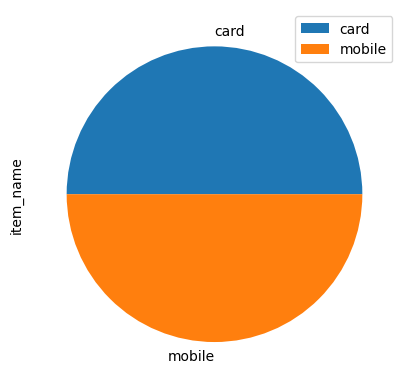

In [22]:
df_q7.plot.pie(y='item_name')

# Q8. What season(quarter) is the worst for each product item?

In [31]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT i.item_name, t.quarter, SUM(fact.quantity) " \
              "FROM ecomdb_star_schema.fact_table fact " \
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=fact.item_key " \
              "JOIN ecomdb_star_schema.time_dim t on t.time_key=fact.time_key " \
              "GROUP BY CUBE(i.item_name, t.quarter) " \
              "ORDER BY i.item_name, SUM(fact.quantity) "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('100% Juice Box Variety 6.75 oz ', 'Q1', Decimal('5698')),
 ('100% Juice Box Variety 6.75 oz ', 'Q4', Decimal('5806')),
 ('100% Juice Box Variety 6.75 oz ', 'Q2', Decimal('5876')),
 ('100% Juice Box Variety 6.75 oz ', 'Q3', Decimal('6045')),
 ('100% Juice Box Variety 6.75 oz ', None, Decimal('23425')),
 ('A&W Root Beer - 12 oz cans', 'Q2', Decimal('5735')),
 ('A&W Root Beer - 12 oz cans', 'Q4', Decimal('5820')),
 ('A&W Root Beer - 12 oz cans', 'Q1', Decimal('5965')),
 ('A&W Root Beer - 12 oz cans', 'Q3', Decimal('6103')),
 ('A&W Root Beer - 12 oz cans', None, Decimal('23623')),
 ('A&W Root Beer Diet - 12 oz cans', 'Q4', Decimal('5589')),
 ('A&W Root Beer Diet - 12 oz cans', 'Q2', Decimal('5627')),
 ('A&W Root Beer Diet - 12 oz cans', 'Q3', Decimal('5940')),
 ('A&W Root Beer Diet - 12 oz cans', 'Q1', Decimal('6026')),
 ('A&W Root Beer Diet - 12 oz cans', None, Decimal('23182')),
 ('Advil 2 pill packets', 'Q1', Decimal('5453')),
 ('Advil 2 pill packets', 'Q3', Decimal('5647')),
 ('Advi

In [32]:
df_q8 = pd.DataFrame(records, columns=['item_name', 'quarter', 'quantity'])
df_q8

,item_name,quarter,quantity
0,100% Juice Box Variety 6.75 oz,Q1,5698
1,100% Juice Box Variety 6.75 oz,Q4,5806
2,100% Juice Box Variety 6.75 oz,Q2,5876
3,100% Juice Box Variety 6.75 oz,Q3,6045
4,100% Juice Box Variety 6.75 oz,None,23425
...,...,...,...
1295,None,Q1,1483656
1296,None,Q2,1489068
1297,None,Q4,1505739
1298,None,Q3,1521722


In [33]:
df_q8 = df_q8.dropna()
df_q8 = df_q8.groupby('item_name').head(1)
df_q8

,item_name,quarter,quantity
0,100% Juice Box Variety 6.75 oz,Q1,5698
5,A&W Root Beer - 12 oz cans,Q2,5735
10,A&W Root Beer Diet - 12 oz cans,Q4,5589
15,Advil 2 pill packets,Q1,5453
20,All Purpose Cleaner 409 Spray,Q1,5325
...,...,...,...
1270,Welch's 100% Juice Variety10 oz,Q2,5494
1275,Wint O Green LifeSavers Sugar Free,Q1,5323
1280,Wonderful Pistachios (in shell),Q1,5578
1285,Yoplait Original Yogurt Variety Pack,Q1,5426


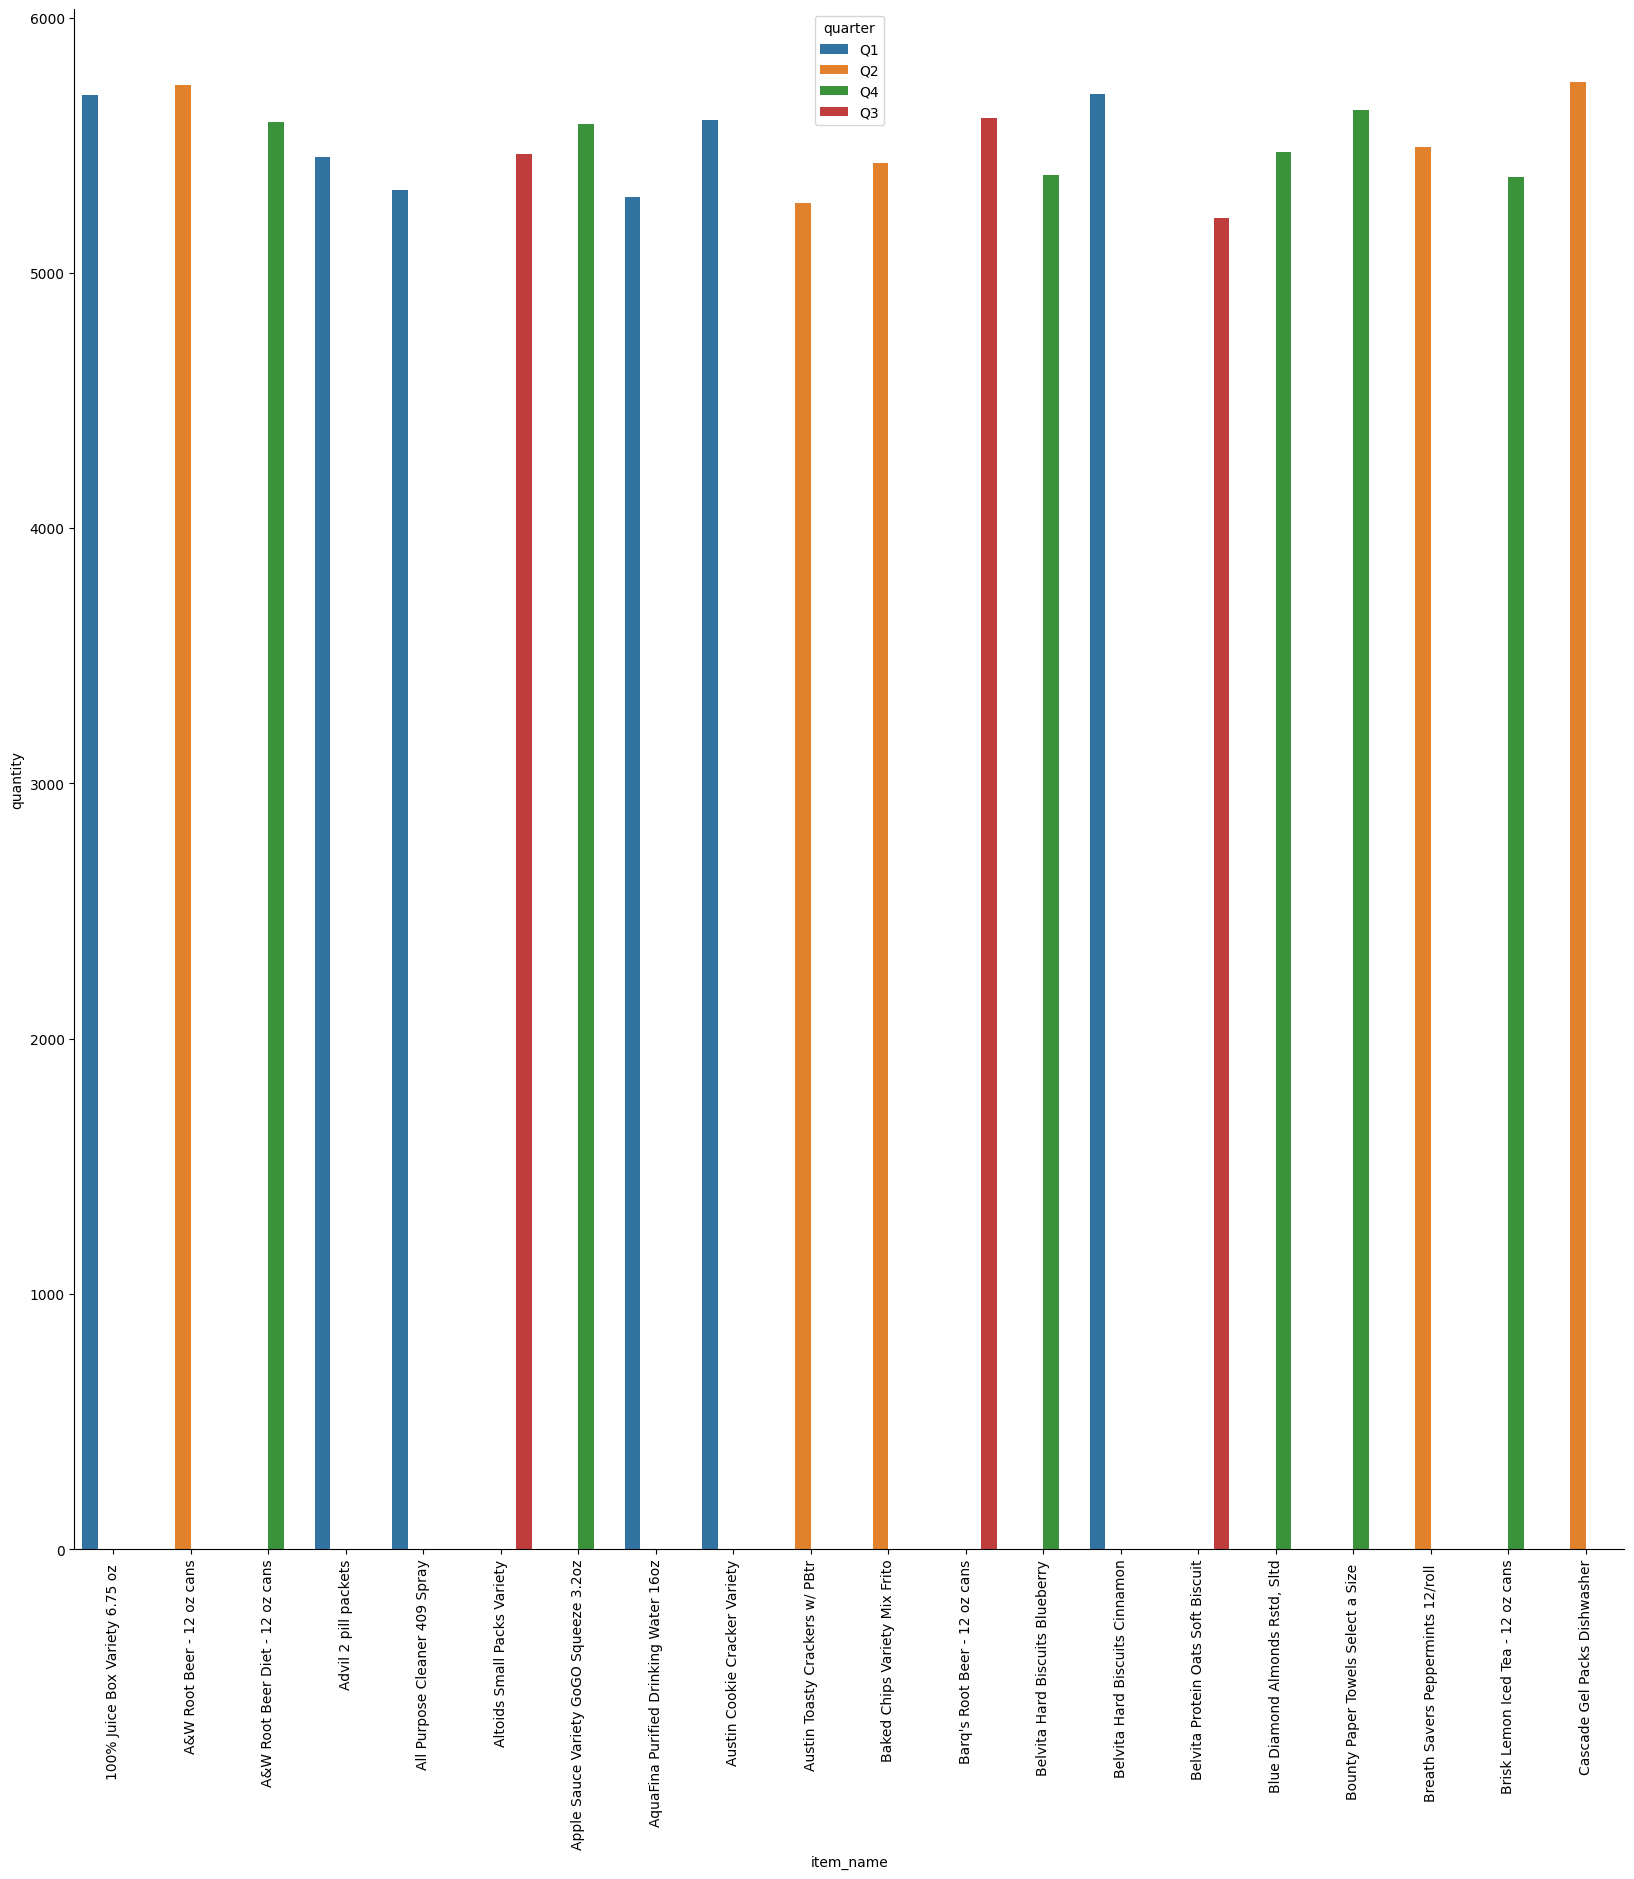

In [39]:
df_q8 = df_q8.head(20)
fig, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=90)
sns.barplot(y=df_q8['quantity'], x=df_q8['item_name'], hue=df_q8['quarter'], ax=ax)
sns.despine(fig)

# Q9. Break down the total sales of items geographically (division-wise)

In [27]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT i.item_name, s.division, SUM(fact.total_price) " \
              "FROM ecomdb_star_schema.fact_table fact " \
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=fact.item_key " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=fact.store_key " \
              "GROUP BY CUBE(i.item_name, s.division) " \
              "ORDER BY i.item_name, s.division "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('100% Juice Box Variety 6.75 oz ', 'BARISAL', Decimal('23790.0')),
 ('100% Juice Box Variety 6.75 oz ', 'CHITTAGONG', Decimal('64950.0')),
 ('100% Juice Box Variety 6.75 oz ', 'DHAKA', Decimal('141195.0')),
 ('100% Juice Box Variety 6.75 oz ', 'KHULNA', Decimal('37755.0')),
 ('100% Juice Box Variety 6.75 oz ', 'RAJSHAHI', Decimal('38730.0')),
 ('100% Juice Box Variety 6.75 oz ', 'RANGPUR', Decimal('26685.0')),
 ('100% Juice Box Variety 6.75 oz ', 'SYLHET', Decimal('18270.0')),
 ('100% Juice Box Variety 6.75 oz ', None, Decimal('351375.0')),
 ('A&W Root Beer - 12 oz cans', 'BARISAL', Decimal('19101.5')),
 ('A&W Root Beer - 12 oz cans', 'CHITTAGONG', Decimal('52060.5')),
 ('A&W Root Beer - 12 oz cans', 'DHAKA', Decimal('107479.0')),
 ('A&W Root Beer - 12 oz cans', 'KHULNA', Decimal('28382.0')),
 ('A&W Root Beer - 12 oz cans', 'RAJSHAHI', Decimal('27795.5')),
 ('A&W Root Beer - 12 oz cans', 'RANGPUR', Decimal('21597.0')),
 ('A&W Root Beer - 12 oz cans', 'SYLHET', Decimal('15249.0')),
 (

In [28]:
df_q9 = pd.DataFrame(records, columns=['item_name', 'division', 'quantity'])
df_q9 = df_q9.dropna()
df_q9

,item_name,division,quantity
0,100% Juice Box Variety 6.75 oz,BARISAL,23790.0
1,100% Juice Box Variety 6.75 oz,CHITTAGONG,64950.0
2,100% Juice Box Variety 6.75 oz,DHAKA,141195.0
3,100% Juice Box Variety 6.75 oz,KHULNA,37755.0
4,100% Juice Box Variety 6.75 oz,RAJSHAHI,38730.0
...,...,...,...
2066,Zoo Animal Cookies/Crackers,DHAKA,118286.0
2067,Zoo Animal Cookies/Crackers,KHULNA,35434.0
2068,Zoo Animal Cookies/Crackers,RAJSHAHI,37100.0
2069,Zoo Animal Cookies/Crackers,RANGPUR,25186.0


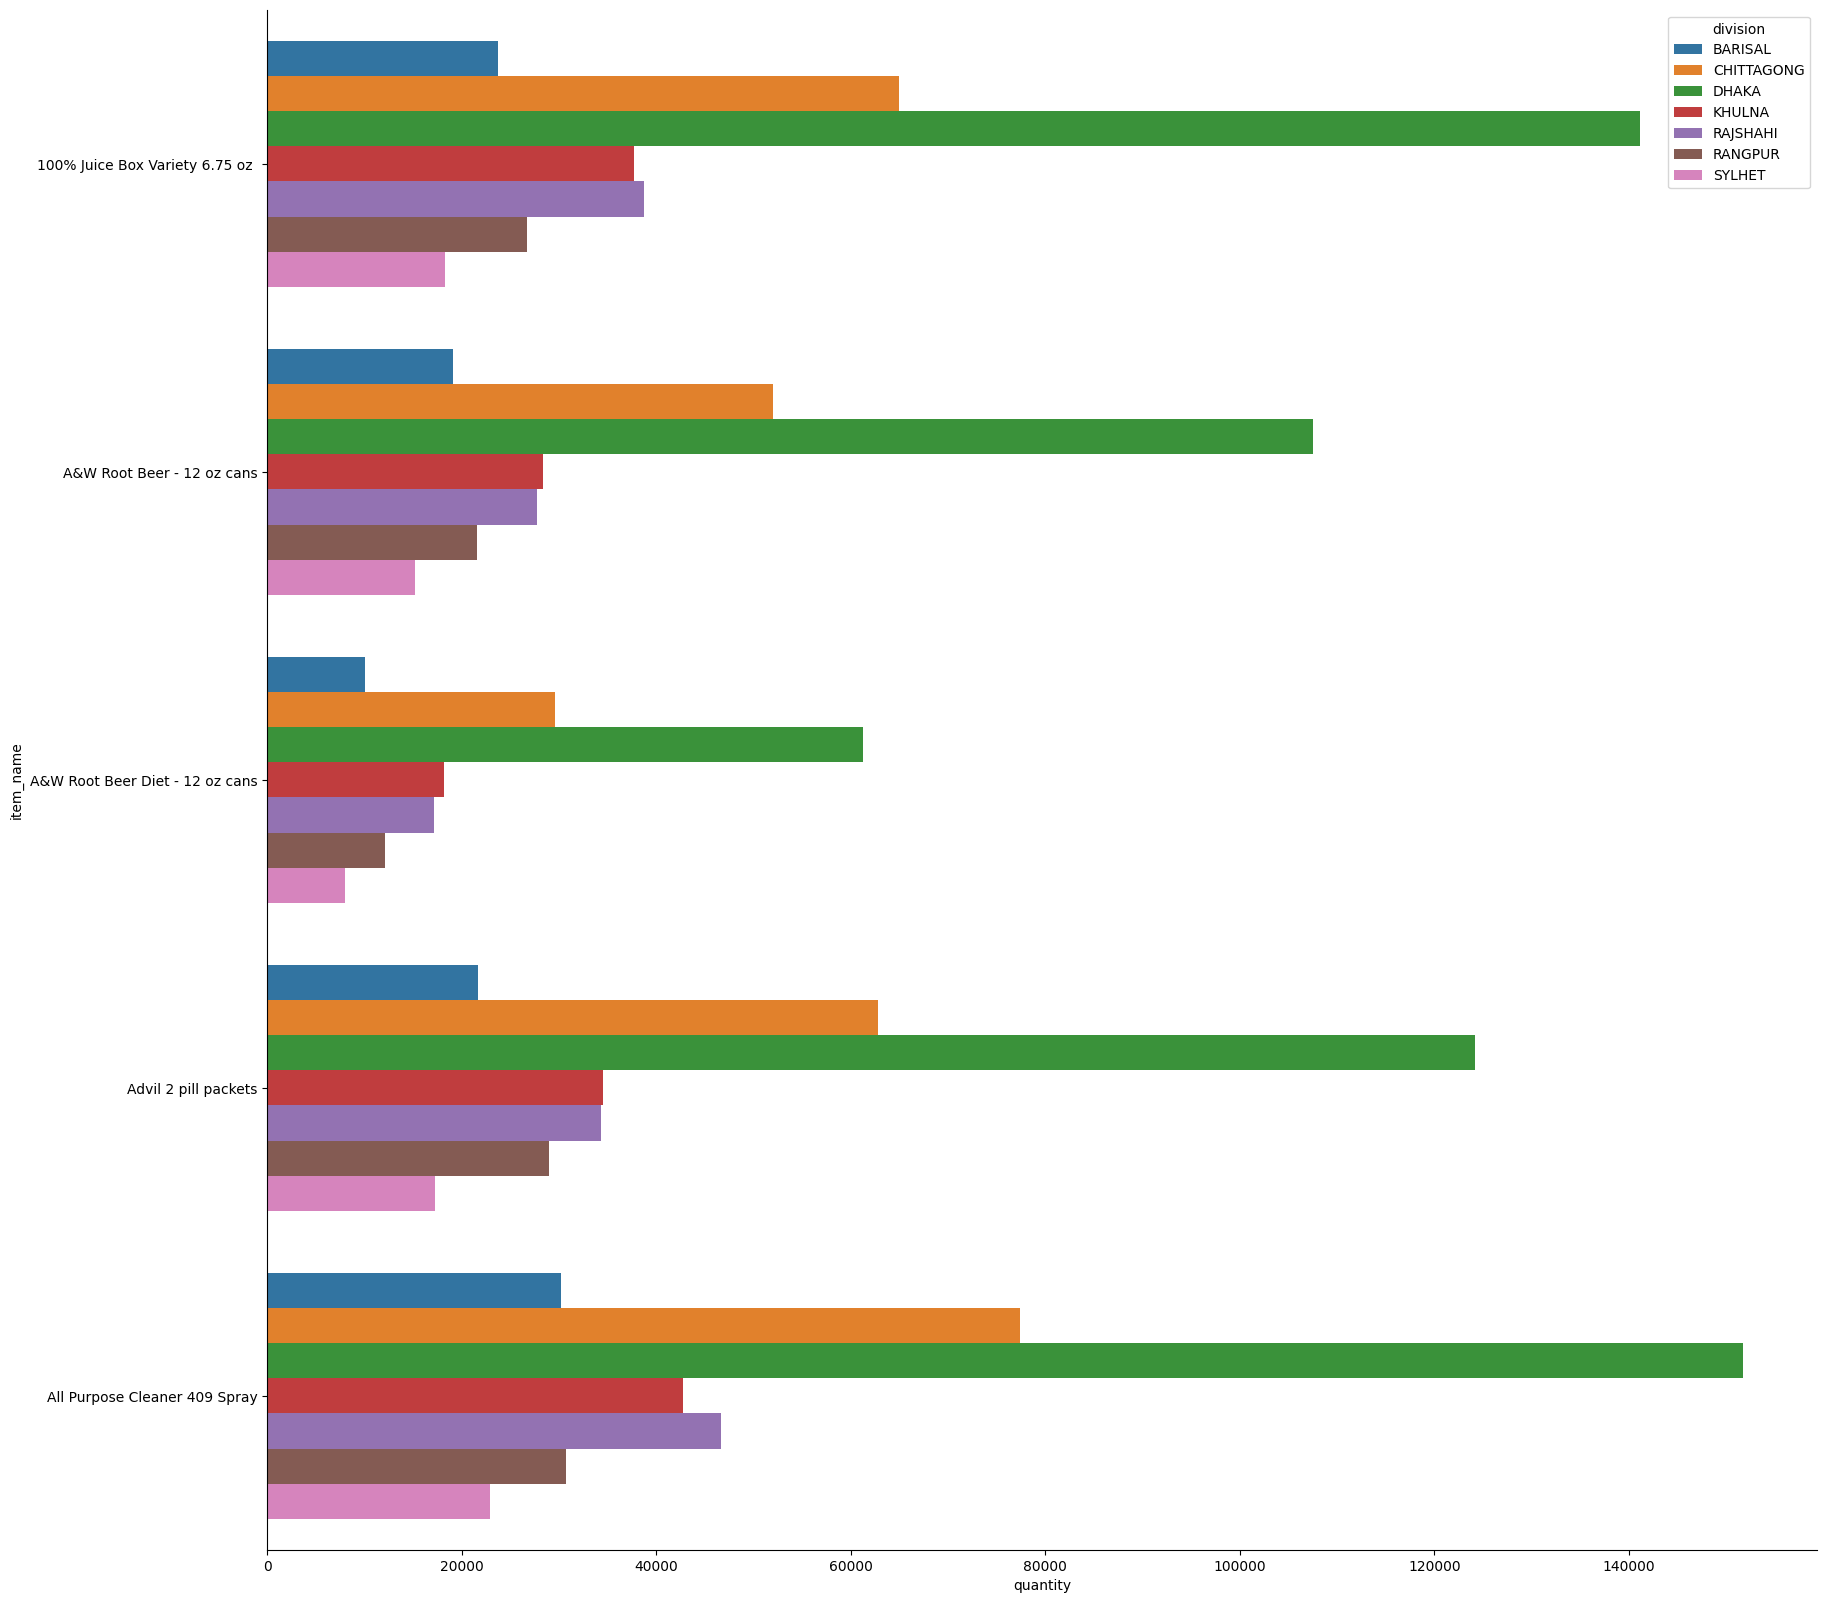

In [30]:
df_q9 = df_q9.head(35)
fig, ax = plt.subplots(figsize=(20, 20))
sns.barplot(x=df_q9['quantity'], y=df_q9['item_name'], hue=df_q9['division'], ax=ax)
sns.despine(fig)

# Q10.  What are the average sales of products sales per store monthly? 

In [17]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.store_key, t.month, AVG(fact.total_price) " \
              "FROM ecomdb_star_schema.fact_table fact " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=fact.store_key " \
              "JOIN ecomdb_star_schema.time_dim t on t.time_key=fact.time_key " \
              "GROUP BY CUBE(s.store_key, t.month) " \
              "ORDER BY s.store_key, t.month "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('S0001', 1, Decimal('97.7543103448275862')),
 ('S0001', 2, Decimal('100.5776699029126214')),
 ('S0001', 3, Decimal('109.4158878504672897')),
 ('S0001', 4, Decimal('98.8805309734513274')),
 ('S0001', 5, Decimal('99.5245535714285714')),
 ('S0001', 6, Decimal('101.2459349593495935')),
 ('S0001', 7, Decimal('103.9189189189189189')),
 ('S0001', 8, Decimal('105.1269531250000000')),
 ('S0001', 9, Decimal('96.1901041666666667')),
 ('S0001', 10, Decimal('104.6166666666666667')),
 ('S0001', 11, Decimal('103.8355855855855856')),
 ('S0001', 12, Decimal('107.8697478991596639')),
 ('S0001', None, Decimal('102.5407569141193595')),
 ('S0002', 1, Decimal('98.2902684563758389')),
 ('S0002', 2, Decimal('106.3849557522123894')),
 ('S0002', 3, Decimal('102.7565217391304348')),
 ('S0002', 4, Decimal('104.0798969072164948')),
 ('S0002', 5, Decimal('109.1587591240875912')),
 ('S0002', 6, Decimal('100.9268867924528302')),
 ('S0002', 7, Decimal('95.6513157894736842')),
 ('S0002', 8, Decimal('108.9462809917355

In [25]:
df_q10 = pd.DataFrame(records, columns=['store_key', 'month', 'avg_sales'])
df_q10 = df_q10.dropna()
df_q10['month'] = df_q10['month'].astype(int)
df_q10

,store_key,month,avg_sales
0,S0001,1,97.7543103448275862
1,S0001,2,100.5776699029126214
2,S0001,3,109.4158878504672897
3,S0001,4,98.8805309734513274
4,S0001,5,99.5245535714285714
...,...,...,...
9432,S0099,8,96.2933673469387755
9433,S0099,9,114.1365740740740741
9434,S0099,10,102.7897727272727273
9435,S0099,11,107.3810679611650485


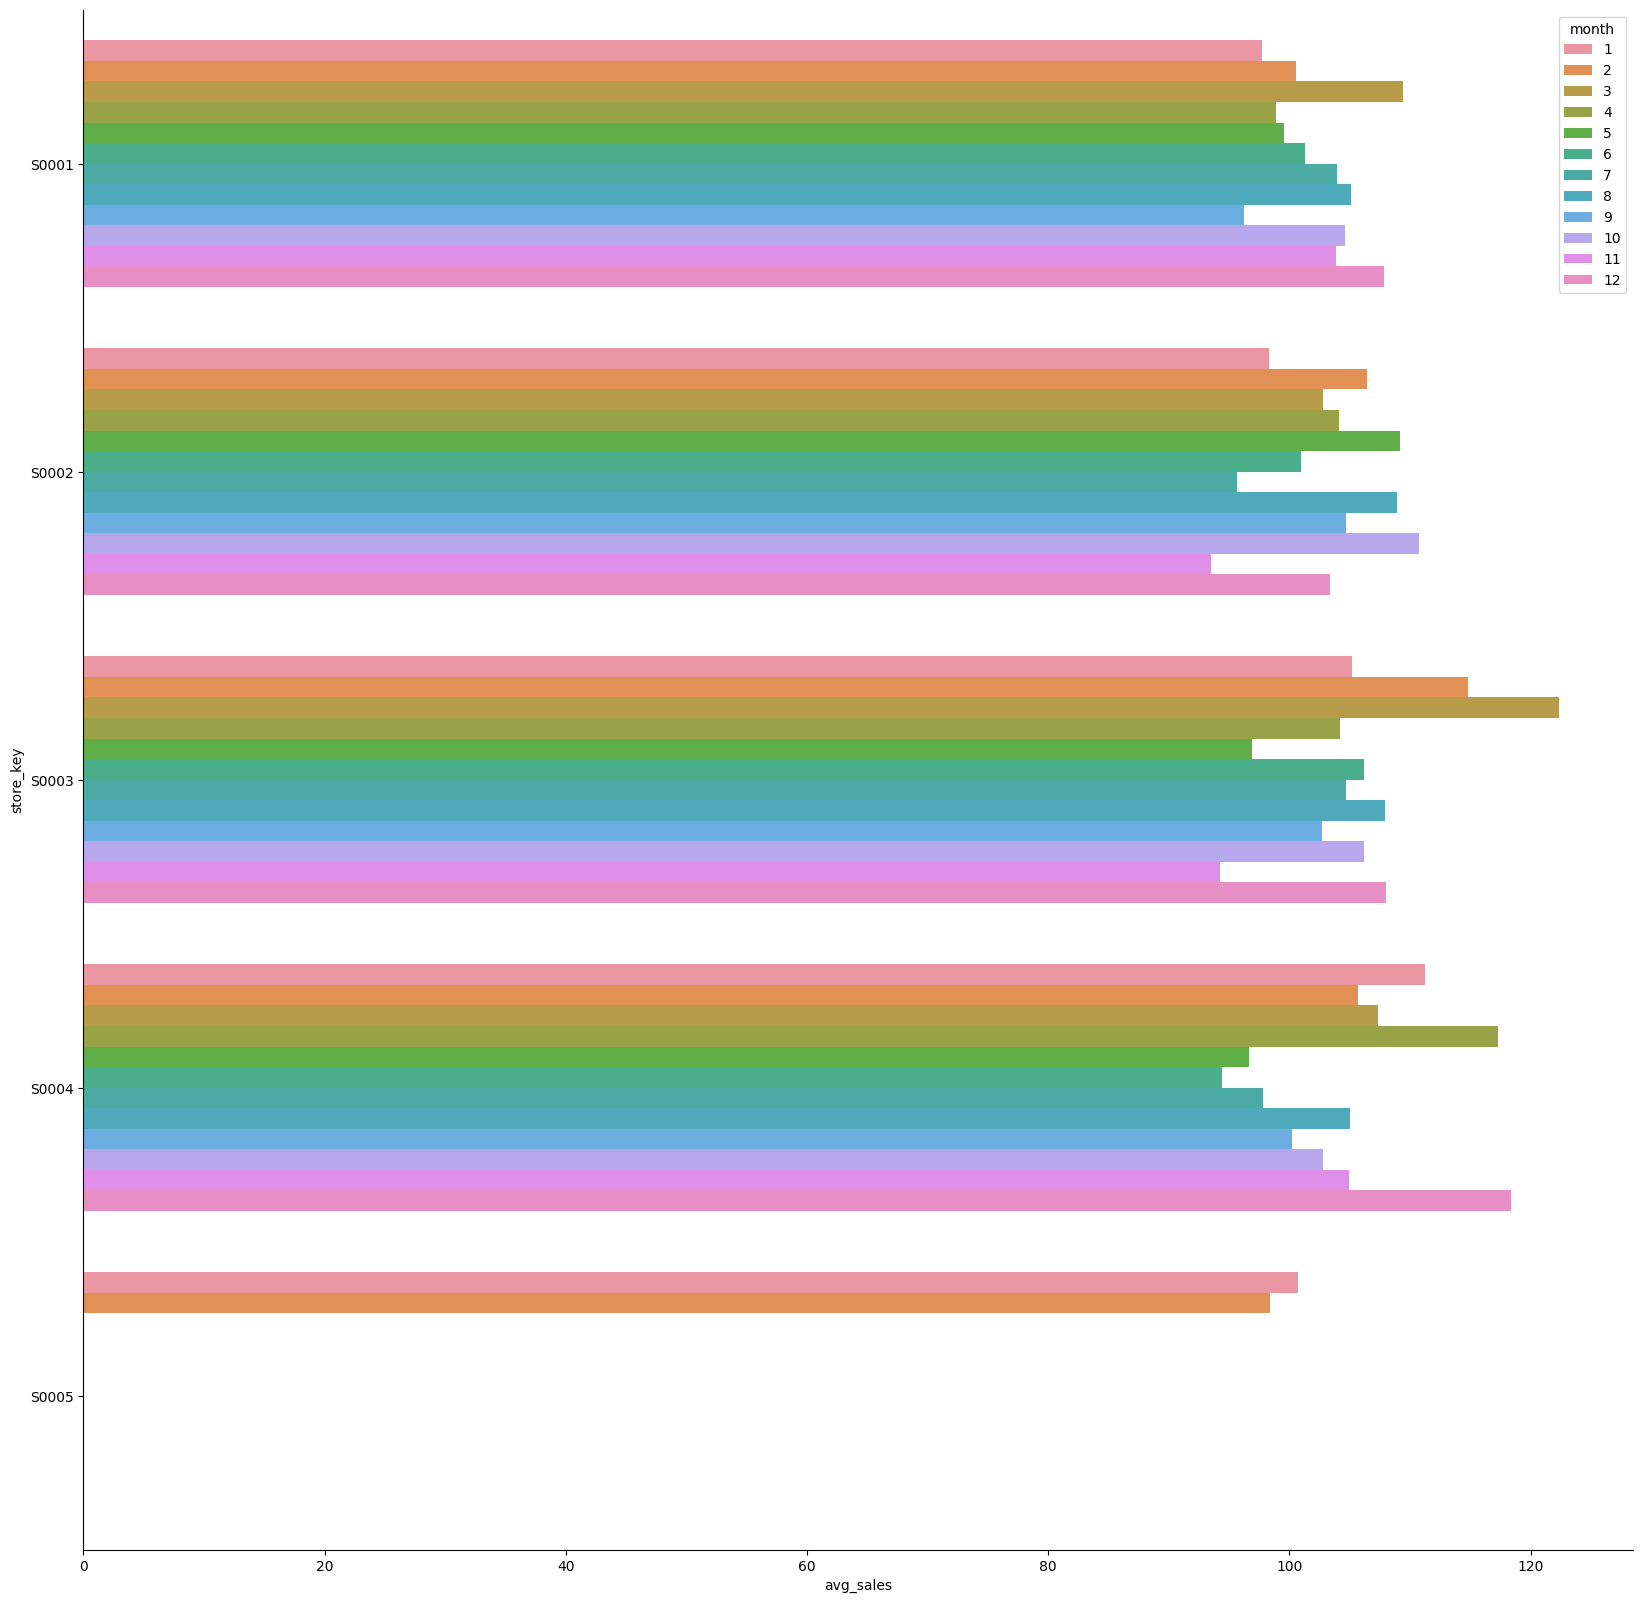

In [26]:
df_q10 = df_q10.head(50)
fig, ax = plt.subplots(figsize=(20, 20))
sns.barplot(x=df_q10['avg_sales'], y=df_q10['store_key'], hue=df_q10['month'], ax=ax)
sns.despine(fig)

# Please make a minimum of two decision questions for the following analytics:
1. store and time dimensional financial analytics,
2. customer and time dimensional financial analytics,
3. item and time dimensional financial analytics,
4. store and time dimensional inventory analytics,
5. item and time dimensional inventory analytics.

# Analysis 1.1: Which store has the most sales in each division in 2021?

In [65]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, s.store_key, SUM(fact.total_price) " \
              "FROM ecomdb_star_schema.fact_table fact " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=fact.store_key " \
              "JOIN ecomdb_star_schema.time_dim t on t.time_key=fact.time_key " \
              "WHERE t.year='2021' " \
              "GROUP BY CUBE(s.division, s.store_key) " \
              "ORDER BY s.division ASC, SUM(fact.total_price) DESC"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('BARISAL', None, Decimal('64801.25')),
 ('BARISAL', 'S00544', Decimal('2576.0')),
 ('BARISAL', 'S00526', Decimal('2344.5')),
 ('BARISAL', 'S00723', Decimal('1993.5')),
 ('BARISAL', 'S00518', Decimal('1946.25')),
 ('BARISAL', 'S00536', Decimal('1902.75')),
 ('BARISAL', 'S00542', Decimal('1753.25')),
 ('BARISAL', 'S00549', Decimal('1659.25')),
 ('BARISAL', 'S00724', Decimal('1641.0')),
 ('BARISAL', 'S00527', Decimal('1601.25')),
 ('BARISAL', 'S00720', Decimal('1575.0')),
 ('BARISAL', 'S00525', Decimal('1452.25')),
 ('BARISAL', 'S00519', Decimal('1449.75')),
 ('BARISAL', 'S00551', Decimal('1430.25')),
 ('BARISAL', 'S00541', Decimal('1424.00')),
 ('BARISAL', 'S00717', Decimal('1411.5')),
 ('BARISAL', 'S00546', Decimal('1397.75')),
 ('BARISAL', 'S00553', Decimal('1390.75')),
 ('BARISAL', 'S00523', Decimal('1376.5')),
 ('BARISAL', 'S00515', Decimal('1327.5')),
 ('BARISAL', 'S00516', Decimal('1323.0')),
 ('BARISAL', 'S00555', Decimal('1305.75')),
 ('BARISAL', 'S00719', Decimal('1254.25')),


In [68]:
df_qa = pd.DataFrame(records, columns=['division', 'store_key', 'total_sales'])
df_qa = df_qa.dropna()
df_qa

,division,store_key,total_sales
1,BARISAL,S00544,2576.0
2,BARISAL,S00526,2344.5
3,BARISAL,S00723,1993.5
4,BARISAL,S00518,1946.25
5,BARISAL,S00536,1902.75
...,...,...,...
728,SYLHET,S0019,681.5
729,SYLHET,S0008,566.5
730,SYLHET,S0003,466.0
731,SYLHET,S0021,414.25


In [69]:
df_qa = df_qa.groupby('division').head(1)
df_qa

,division,store_key,total_sales
1,BARISAL,S00544,2576.0
54,CHITTAGONG,S00413,2501.50
191,DHAKA,S00366,2848.0
472,KHULNA,S00207,2290.0
551,RAJSHAHI,S00160,2440.0
636,RANGPUR,S0054,2828.75
695,SYLHET,S0034,2061.0


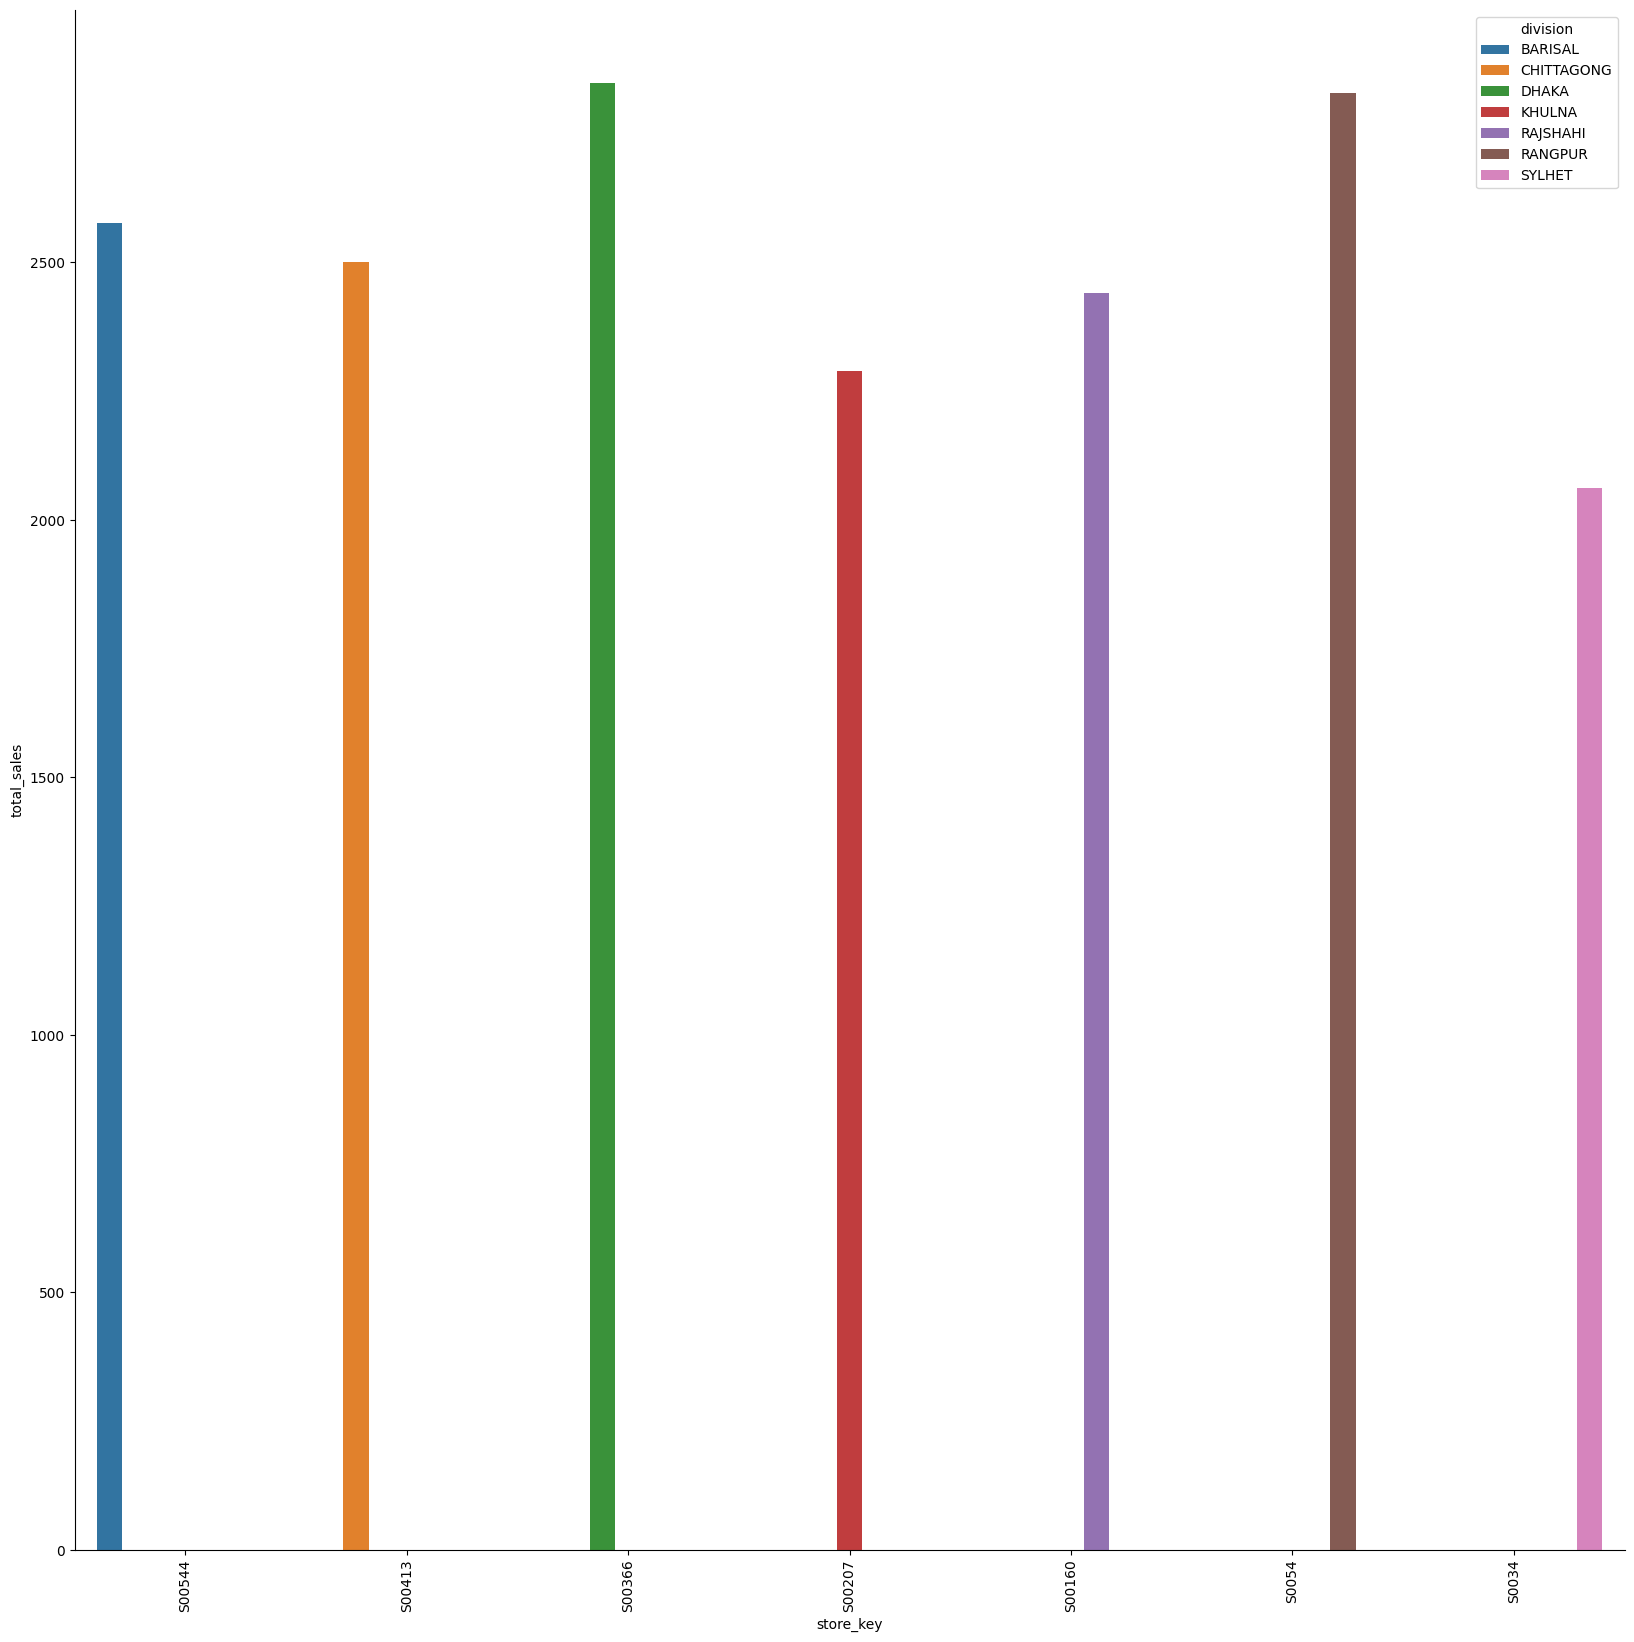

In [71]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=90)
sns.barplot(x=df_qa['store_key'], y=df_qa['total_sales'], hue=df_qa['division'], ax=ax)
sns.despine(fig)

# Analysis 1.2: Which districts have below average sales in last 2 years?

In [96]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.district " \
              "FROM ecomdb_star_schema.fact_table fact " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=fact.store_key " \
              "JOIN ecomdb_star_schema.time_dim t on t.time_key=fact.time_key " \
              "WHERE t.year BETWEEN '2020' AND '2021' " \
              "GROUP BY CUBE(s.district) " \
              "HAVING AVG(fact.total_price) > (SELECT AVG(fact.total_price) FROM ecomdb_star_schema.fact_table fact) " \
              "ORDER BY s.district "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('BAGERHAT',),
 ('BARGUNA',),
 ('BARISAL',),
 ('BRAHMANBARIA',),
 ('CHANDPUR',),
 ('CHAPAI NABABGANJ',),
 ('CHITTAGONG',),
 ("COX'S BAZAR",),
 ('FARIDPUR',),
 ('GAIBANDHA',),
 ('GAZIPUR',),
 ('GOPALGANJ',),
 ('JHALOKATI',),
 ('JHENAIDAH',),
 ('KHAGRACHHARI',),
 ('KHULNA',),
 ('KURIGRAM',),
 ('LAKSHMIPUR',),
 ('LALMONIRHAT',),
 ('MADARIPUR',),
 ('MANIKGANJ',),
 ('MAULVIBAZAR',),
 ('MUNSHIGANJ',),
 ('NAOGAON',),
 ('NARAIL',),
 ('NARAYANGANJ',),
 ('NETRAKONA',),
 ('NOAKHALI',),
 ('PABNA',),
 ('PANCHAGARH',),
 ('PIROJPUR',),
 ('RAJBARI',),
 ('RANGAMATI',),
 ('SATKHIRA',),
 ('SHARIATPUR',),
 ('SHERPUR',),
 ('SIRAJGANJ',),
 ('THAKURGAON',),
 (None,)]

In [97]:
df_qa = pd.DataFrame(records, columns=['district'])
df_qa = df_qa.dropna()
df_qa

,district
0,BAGERHAT
1,BARGUNA
2,BARISAL
3,BRAHMANBARIA
4,CHANDPUR
5,CHAPAI NABABGANJ
6,CHITTAGONG
7,COX'S BAZAR
8,FARIDPUR
9,GAIBANDHA


# Analysis 2.1: Which quarter has the best sales for each customer?

In [101]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT c.customer_key, t.quarter, SUM(fact.total_price) " \
              "FROM ecomdb_star_schema.fact_table fact " \
              "JOIN ecomdb_star_schema.customer_dim c on c.customer_key=fact.customer_key " \
              "JOIN ecomdb_star_schema.time_dim t on t.time_key=fact.time_key " \
              "GROUP BY CUBE(c.customer_key, t.quarter) " \
              "ORDER BY c.customer_key, SUM(fact.total_price) DESC "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('C000001', None, Decimal('8344.75')),
 ('C000001', 'Q4', Decimal('2696.00')),
 ('C000001', 'Q1', Decimal('2099.0')),
 ('C000001', 'Q3', Decimal('1959.50')),
 ('C000001', 'Q2', Decimal('1590.25')),
 ('C000002', None, Decimal('11025.50')),
 ('C000002', 'Q3', Decimal('3616.00')),
 ('C000002', 'Q4', Decimal('2846.0')),
 ('C000002', 'Q2', Decimal('2838.0')),
 ('C000002', 'Q1', Decimal('1725.5')),
 ('C000003', None, Decimal('12120.25')),
 ('C000003', 'Q1', Decimal('3464.50')),
 ('C000003', 'Q4', Decimal('3213.25')),
 ('C000003', 'Q3', Decimal('2732.0')),
 ('C000003', 'Q2', Decimal('2710.5')),
 ('C000004', None, Decimal('13337.00')),
 ('C000004', 'Q3', Decimal('3800.50')),
 ('C000004', 'Q2', Decimal('3798.25')),
 ('C000004', 'Q4', Decimal('3416.5')),
 ('C000004', 'Q1', Decimal('2321.75')),
 ('C000005', None, Decimal('10893.25')),
 ('C000005', 'Q4', Decimal('3239.75')),
 ('C000005', 'Q2', Decimal('2697.00')),
 ('C000005', 'Q3', Decimal('2556.75')),
 ('C000005', 'Q1', Decimal('2399.75')),
 ('

In [109]:
df_qa = pd.DataFrame(records, columns=['customer_key', 'quarter', 'total_sales'])
df_qa = df_qa.dropna()
df_qa

,customer_key,quarter,total_sales
1,C000001,Q4,2696.00
2,C000001,Q1,2099.0
3,C000001,Q3,1959.50
4,C000001,Q2,1590.25
6,C000002,Q3,3616.00
...,...,...,...
45949,C009190,Q2,2732.75
45951,C009191,Q3,3828.25
45952,C009191,Q2,2872.50
45953,C009191,Q4,2517.0


In [110]:
df_qa = df_qa.groupby('customer_key').head(1)
df_qa

,customer_key,quarter,total_sales
1,C000001,Q4,2696.00
6,C000002,Q3,3616.00
11,C000003,Q1,3464.50
16,C000004,Q3,3800.50
21,C000005,Q4,3239.75
...,...,...,...
45931,C009187,Q4,3475.00
45936,C009188,Q3,4246.00
45941,C009189,Q1,4500.75
45946,C009190,Q3,3710.50


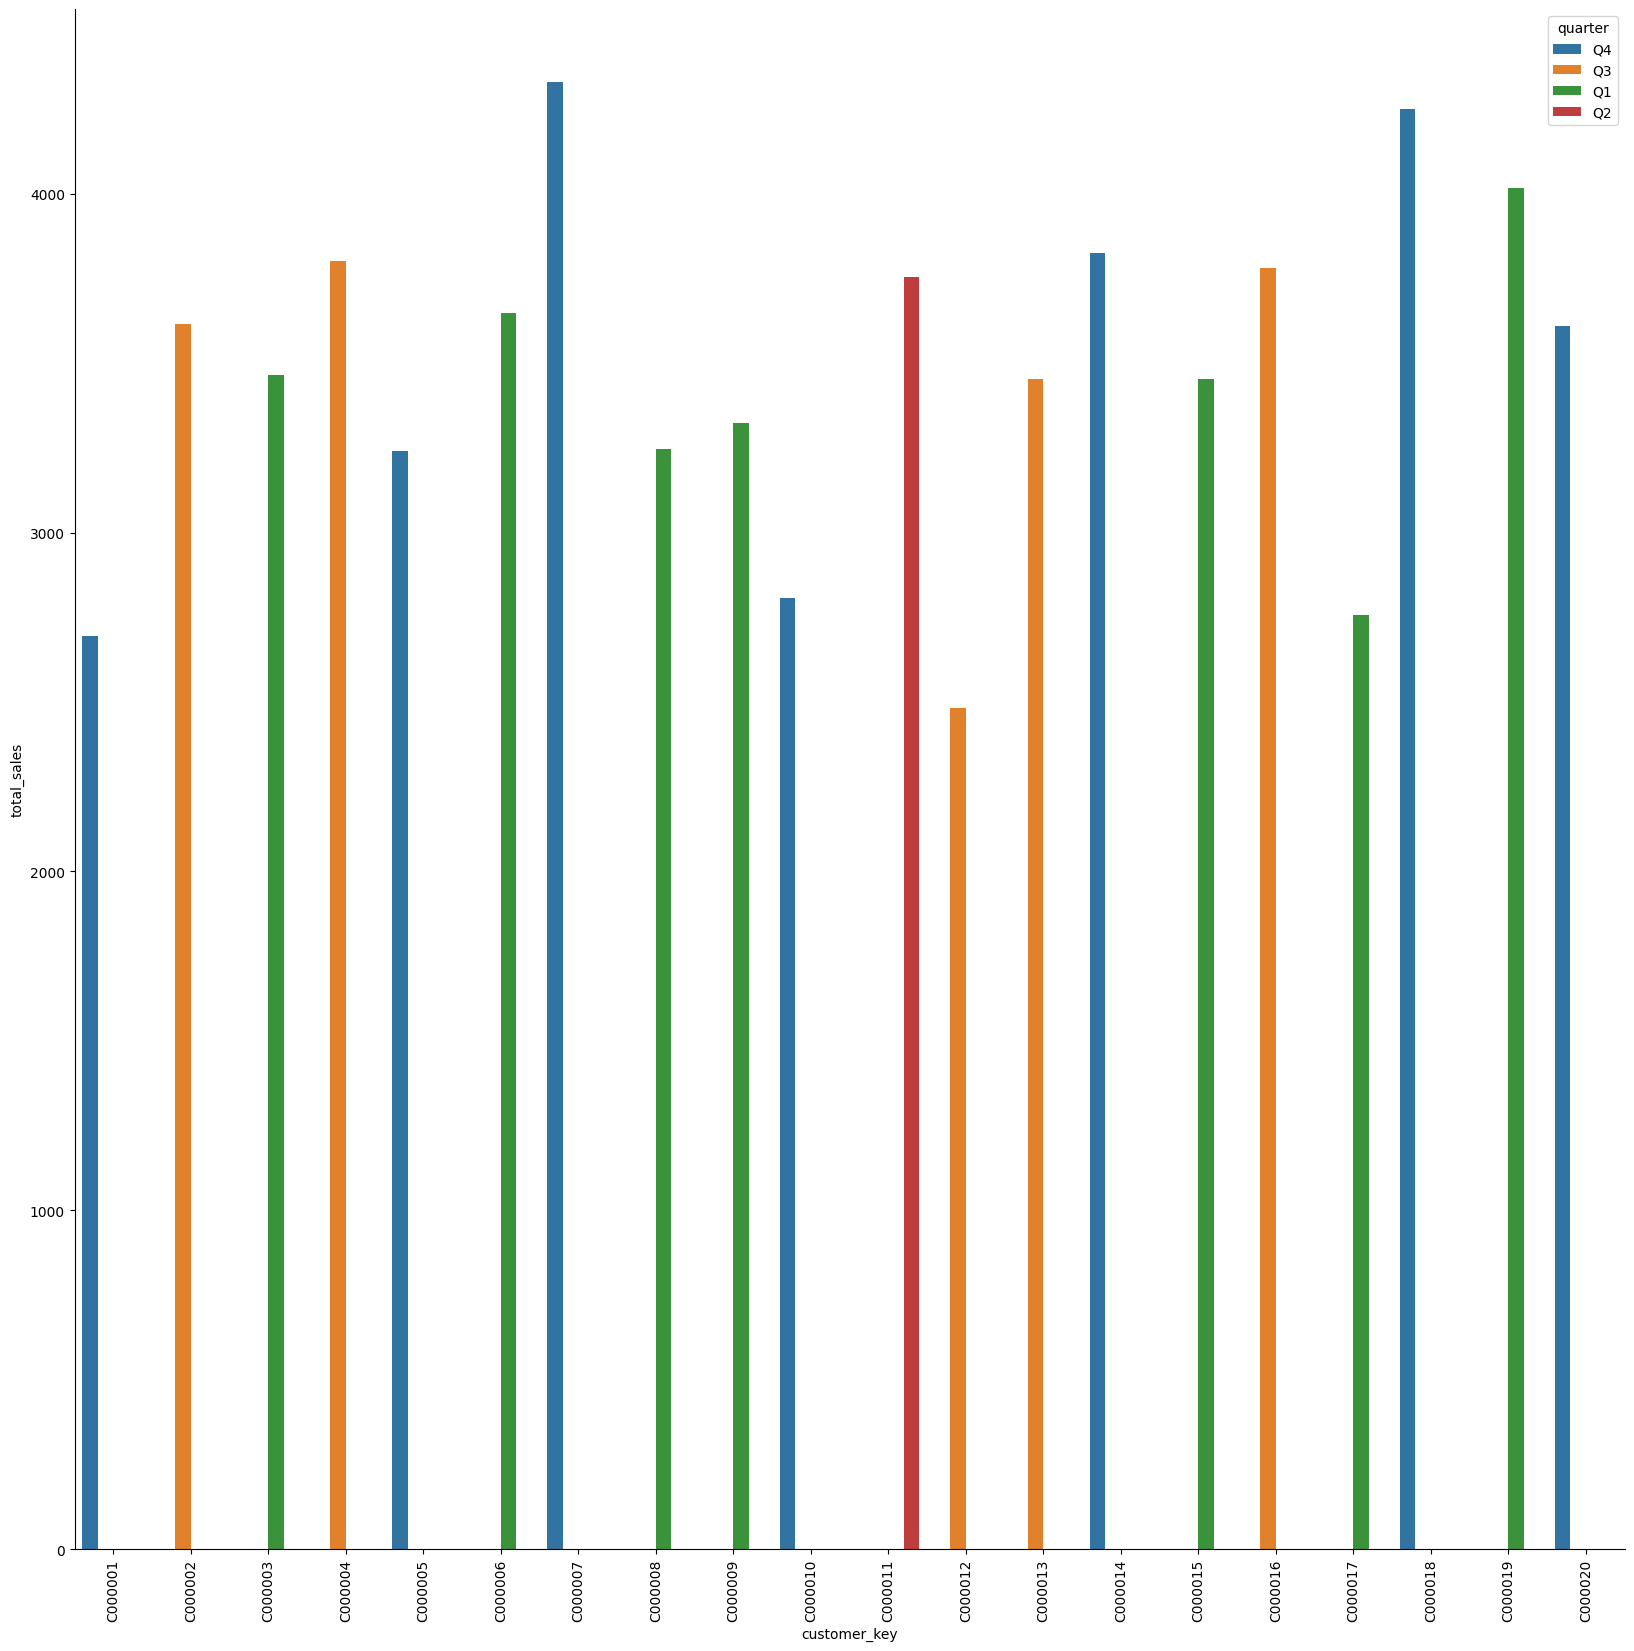

In [111]:
df_qa = df_qa.head(20)
fig, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=90)
sns.barplot(x=df_qa['customer_key'], y=df_qa['total_sales'], hue=df_qa['quarter'], ax=ax)
sns.despine(fig)

# Analysis 2.2: Which year each customer has spent the most?

In [6]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT temp_table.customer_key, temp_table.year, temp_table.total_spent " \
              "FROM ( SELECT c.customer_key, t.year, SUM(fact.total_price) AS total_spent, " \
              "RANK() OVER (PARTITION BY c.customer_key ORDER BY SUM(fact.total_price) DESC) AS rank " \
              "FROM ecomdb_star_schema.fact_table fact " \
              "JOIN ecomdb_star_schema.time_dim t ON t.time_key = fact.time_key " \
              "JOIN ecomdb_star_schema.customer_dim c ON c.customer_key = fact.customer_key " \
              "GROUP BY c.customer_key, t.year ) AS temp_table " \
              "WHERE temp_table.rank = 1 " \
              "ORDER BY temp_table.customer_key ASC"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('C000001', 2017, Decimal('1957.25')),
 ('C000002', 2016, Decimal('2767.5')),
 ('C000003', 2017, Decimal('3208.0')),
 ('C000004', 2014, Decimal('2449.75')),
 ('C000005', 2019, Decimal('2075.75')),
 ('C000006', 2020, Decimal('2634.0')),
 ('C000007', 2017, Decimal('2537.0')),
 ('C000008', 2018, Decimal('1814.25')),
 ('C000009', 2020, Decimal('2688.75')),
 ('C000010', 2019, Decimal('2300.0')),
 ('C000011', 2015, Decimal('2848.5')),
 ('C000012', 2018, Decimal('1475.75')),
 ('C000013', 2019, Decimal('1661.75')),
 ('C000014', 2017, Decimal('3345.75')),
 ('C000015', 2016, Decimal('2571.0')),
 ('C000016', 2018, Decimal('2118.25')),
 ('C000017', 2017, Decimal('1933.5')),
 ('C000018', 2018, Decimal('2297.75')),
 ('C000019', 2017, Decimal('2878.00')),
 ('C000020', 2018, Decimal('2335.5')),
 ('C000021', 2017, Decimal('2167.25')),
 ('C000022', 2016, Decimal('2112.0')),
 ('C000023', 2018, Decimal('2623.00')),
 ('C000024', 2016, Decimal('2099.75')),
 ('C000025', 2019, Decimal('1808.25')),
 ('C000026

In [7]:
df_qa = pd.DataFrame(records, columns=['customer_key', 'year', 'total_spent'])
df_qa

,customer_key,year,total_spent
0,C000001,2017,1957.25
1,C000002,2016,2767.5
2,C000003,2017,3208.0
3,C000004,2014,2449.75
4,C000005,2019,2075.75
...,...,...,...
9190,C009187,2020,2912.25
9191,C009188,2020,2766.0
9192,C009189,2016,2557.5
9193,C009190,2014,2763.0


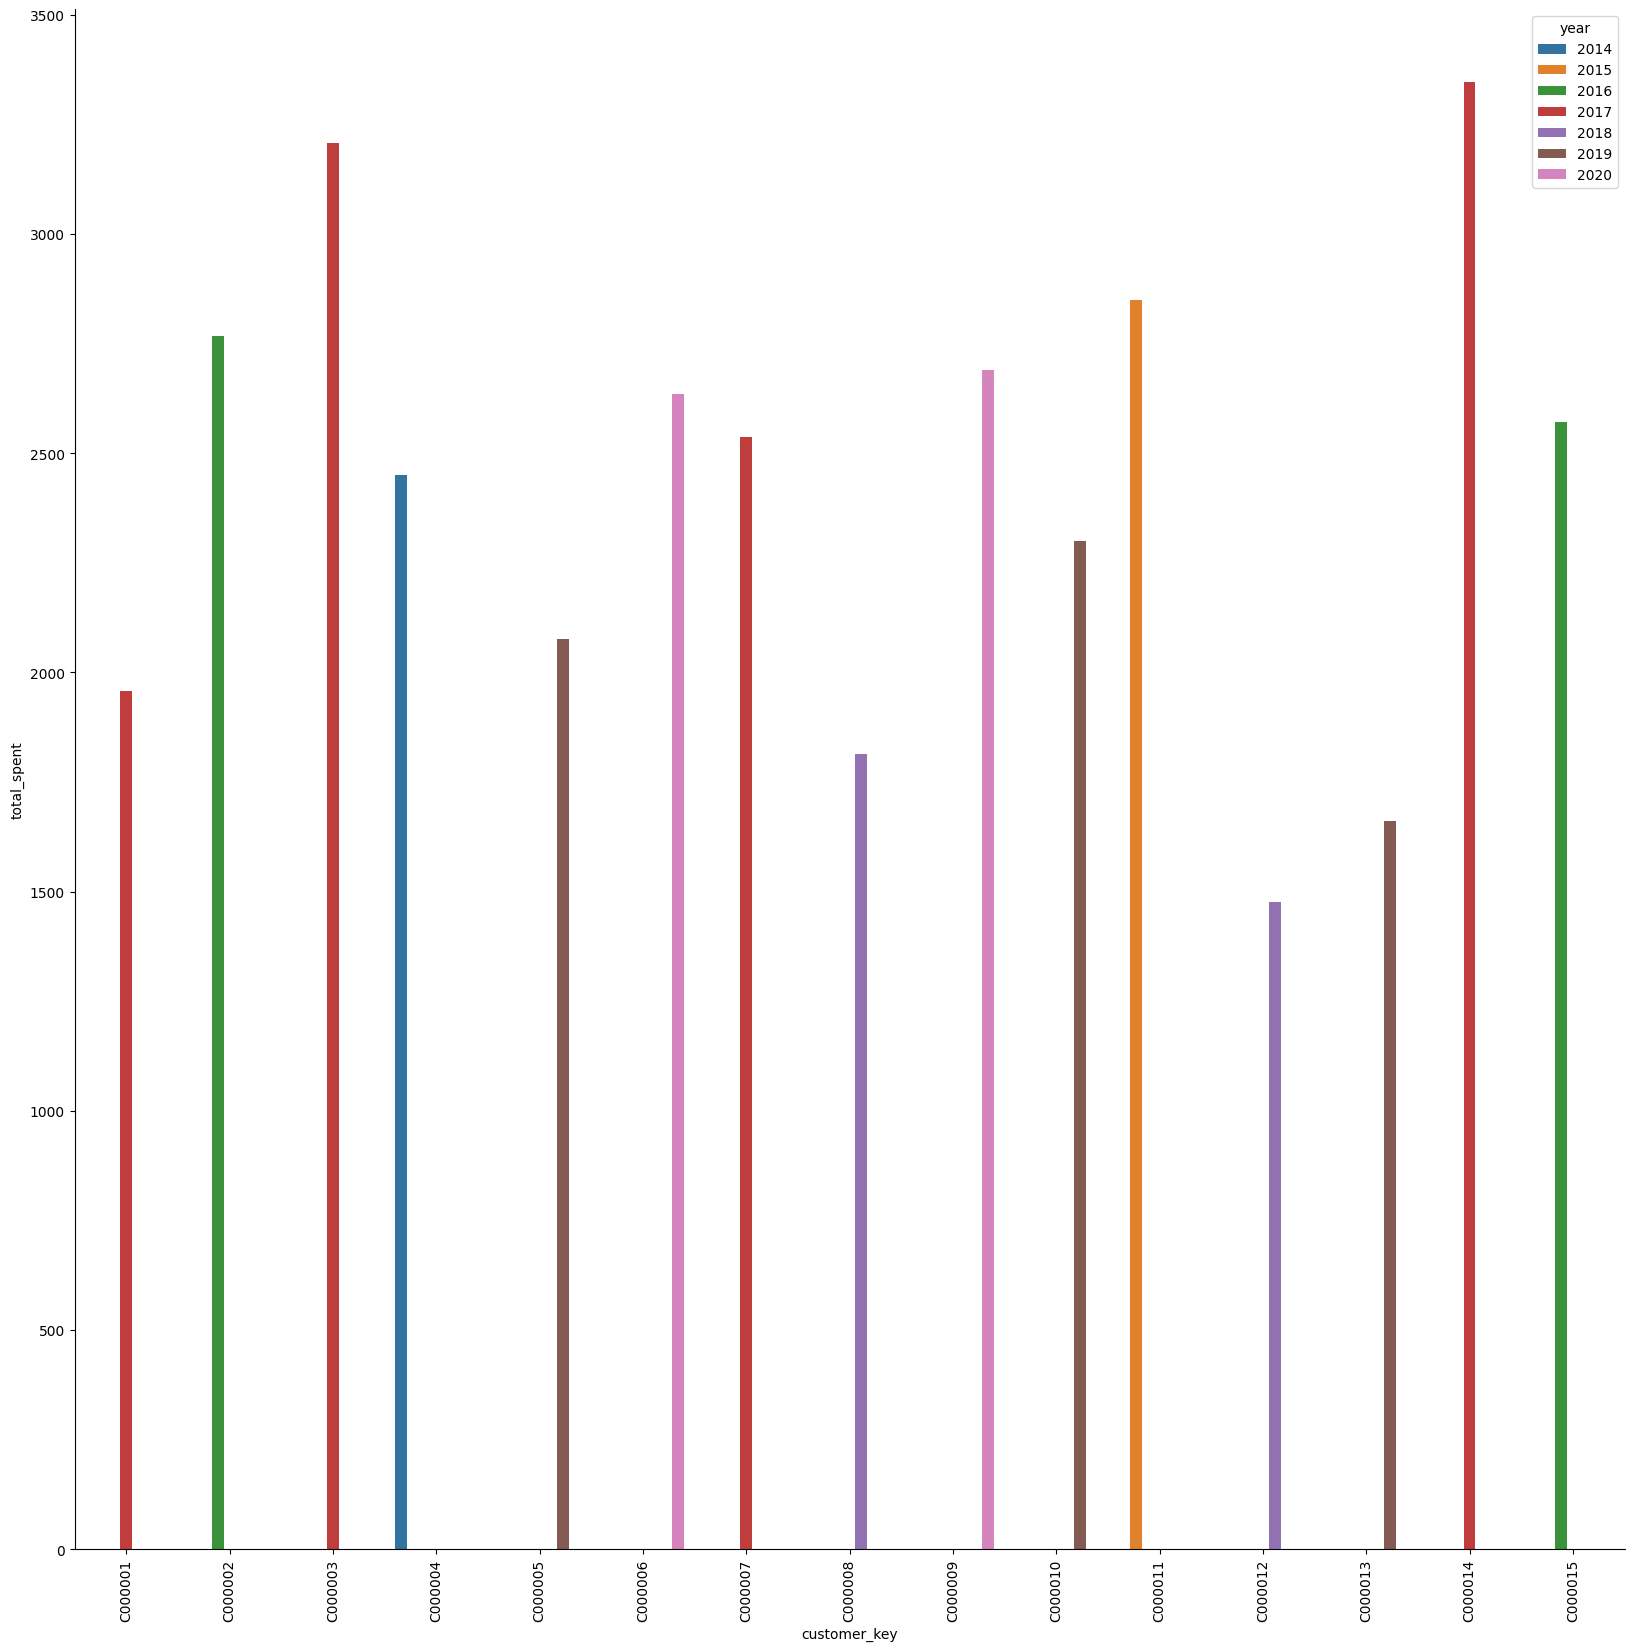

In [11]:
df_qa = df_qa.head(15)
fig, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=90)
sns.barplot(x=df_qa['customer_key'], y=df_qa['total_spent'], hue=df_qa['year'], ax=ax)
sns.despine(fig)

# Analysis 3.1: Total sales for each country between 2015 and 2018.

In [43]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT i.man_country, SUM(fact.total_price) " \
              "FROM ecomdb_star_schema.fact_table fact " \
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=fact.item_key " \
              "JOIN ecomdb_star_schema.time_dim t on t.time_key=fact.time_key " \
              "WHERE t.year >= '2015' AND t.year <= '2018' " \
              "GROUP BY CUBE(i.man_country) " \
              "ORDER BY i.man_country "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('Bangladesh', Decimal('7621925.00')),
 ('Cambodia', Decimal('5410320.00')),
 ('China', Decimal('3415589.25')),
 ('Finland', Decimal('5378733.50')),
 ('Germany', Decimal('6228130.25')),
 ('India', Decimal('7497203.00')),
 ('Lithuania', Decimal('6746383.75')),
 ('Netherlands', Decimal('5970621.25')),
 ('poland', Decimal('6266628.75')),
 ('United States', Decimal('5660697.00')),
 (None, Decimal('60196231.75'))]

In [48]:
df_qa = pd.DataFrame(records, columns=['country_name', 'total_sales'])
df_qa = df_qa.dropna()
df_qa

,country_name,total_sales
0,Bangladesh,7621925.00
1,Cambodia,5410320.00
2,China,3415589.25
3,Finland,5378733.50
4,Germany,6228130.25
5,India,7497203.00
6,Lithuania,6746383.75
7,Netherlands,5970621.25
8,poland,6266628.75
9,United States,5660697.00


<Axes: ylabel='country_name'>

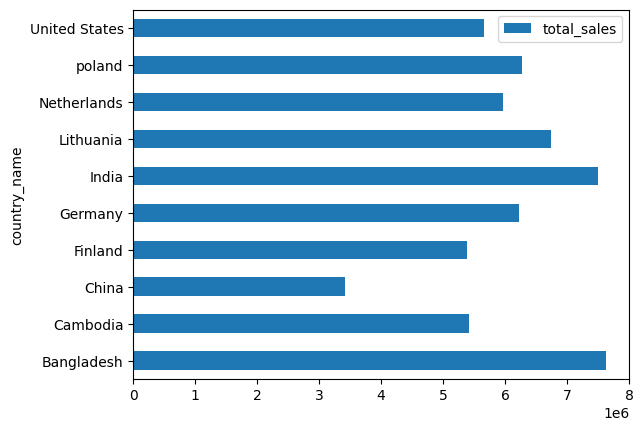

In [49]:
df_qa['total_sales']=df_qa['total_sales'].astype('float64')
df_qa.plot.barh(x='country_name', y='total_sales')

# Analysis 3.2: For each supplier, find the month it has max sales.

In [38]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT temp_table.supplier, temp_table.month, temp_table.total_sales " \
              "FROM ( SELECT i.supplier, t.month, SUM(fact.total_price) AS total_sales, " \
              "RANK() OVER (PARTITION BY i.supplier ORDER BY SUM(fact.total_price) DESC) AS rank " \
              "FROM ecomdb_star_schema.fact_table fact " \
              "JOIN ecomdb_star_schema.time_dim t ON t.time_key = fact.time_key " \
              "JOIN ecomdb_star_schema.item_dim i ON i.item_key = fact.item_key " \
              "GROUP BY i.supplier, t.month ) AS temp_table " \
              "WHERE temp_table.rank = 1 " \
              "ORDER BY temp_table.supplier ASC"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('BIGSO AB', 1, Decimal('1037045.25')),
 ('Bolsius Boxmeer', 8, Decimal('902167.75')),
 ('CHERRY GROUP CO.,LTD', 5, Decimal('533710.25')),
 ('CHROMADURLIN S.A.S', 7, Decimal('939867.25')),
 ('DENIMACH LTD', 7, Decimal('1156895.00')),
 ('Friedola 1888 GmbH', 12, Decimal('941185.75')),
 ('HARDFORD AB', 5, Decimal('824875.75')),
 ('Indo Count Industries Ltd', 1, Decimal('1146321.25')),
 ('MAESA SAS', 8, Decimal('849924.75')),
 ('NINGBO SEDUNO IMP & EXP CO.LTD', 5, Decimal('829512.50'))]

In [40]:
df_qa = pd.DataFrame(records, columns=['supplier', 'month', 'best_sales'])
df_qa = df_qa.dropna()
df_qa

,supplier,month,best_sales
0,BIGSO AB,1,1037045.25
1,Bolsius Boxmeer,8,902167.75
2,"CHERRY GROUP CO.,LTD",5,533710.25
3,CHROMADURLIN S.A.S,7,939867.25
4,DENIMACH LTD,7,1156895.00
5,Friedola 1888 GmbH,12,941185.75
6,HARDFORD AB,5,824875.75
7,Indo Count Industries Ltd,1,1146321.25
8,MAESA SAS,8,849924.75
9,NINGBO SEDUNO IMP & EXP CO.LTD,5,829512.50


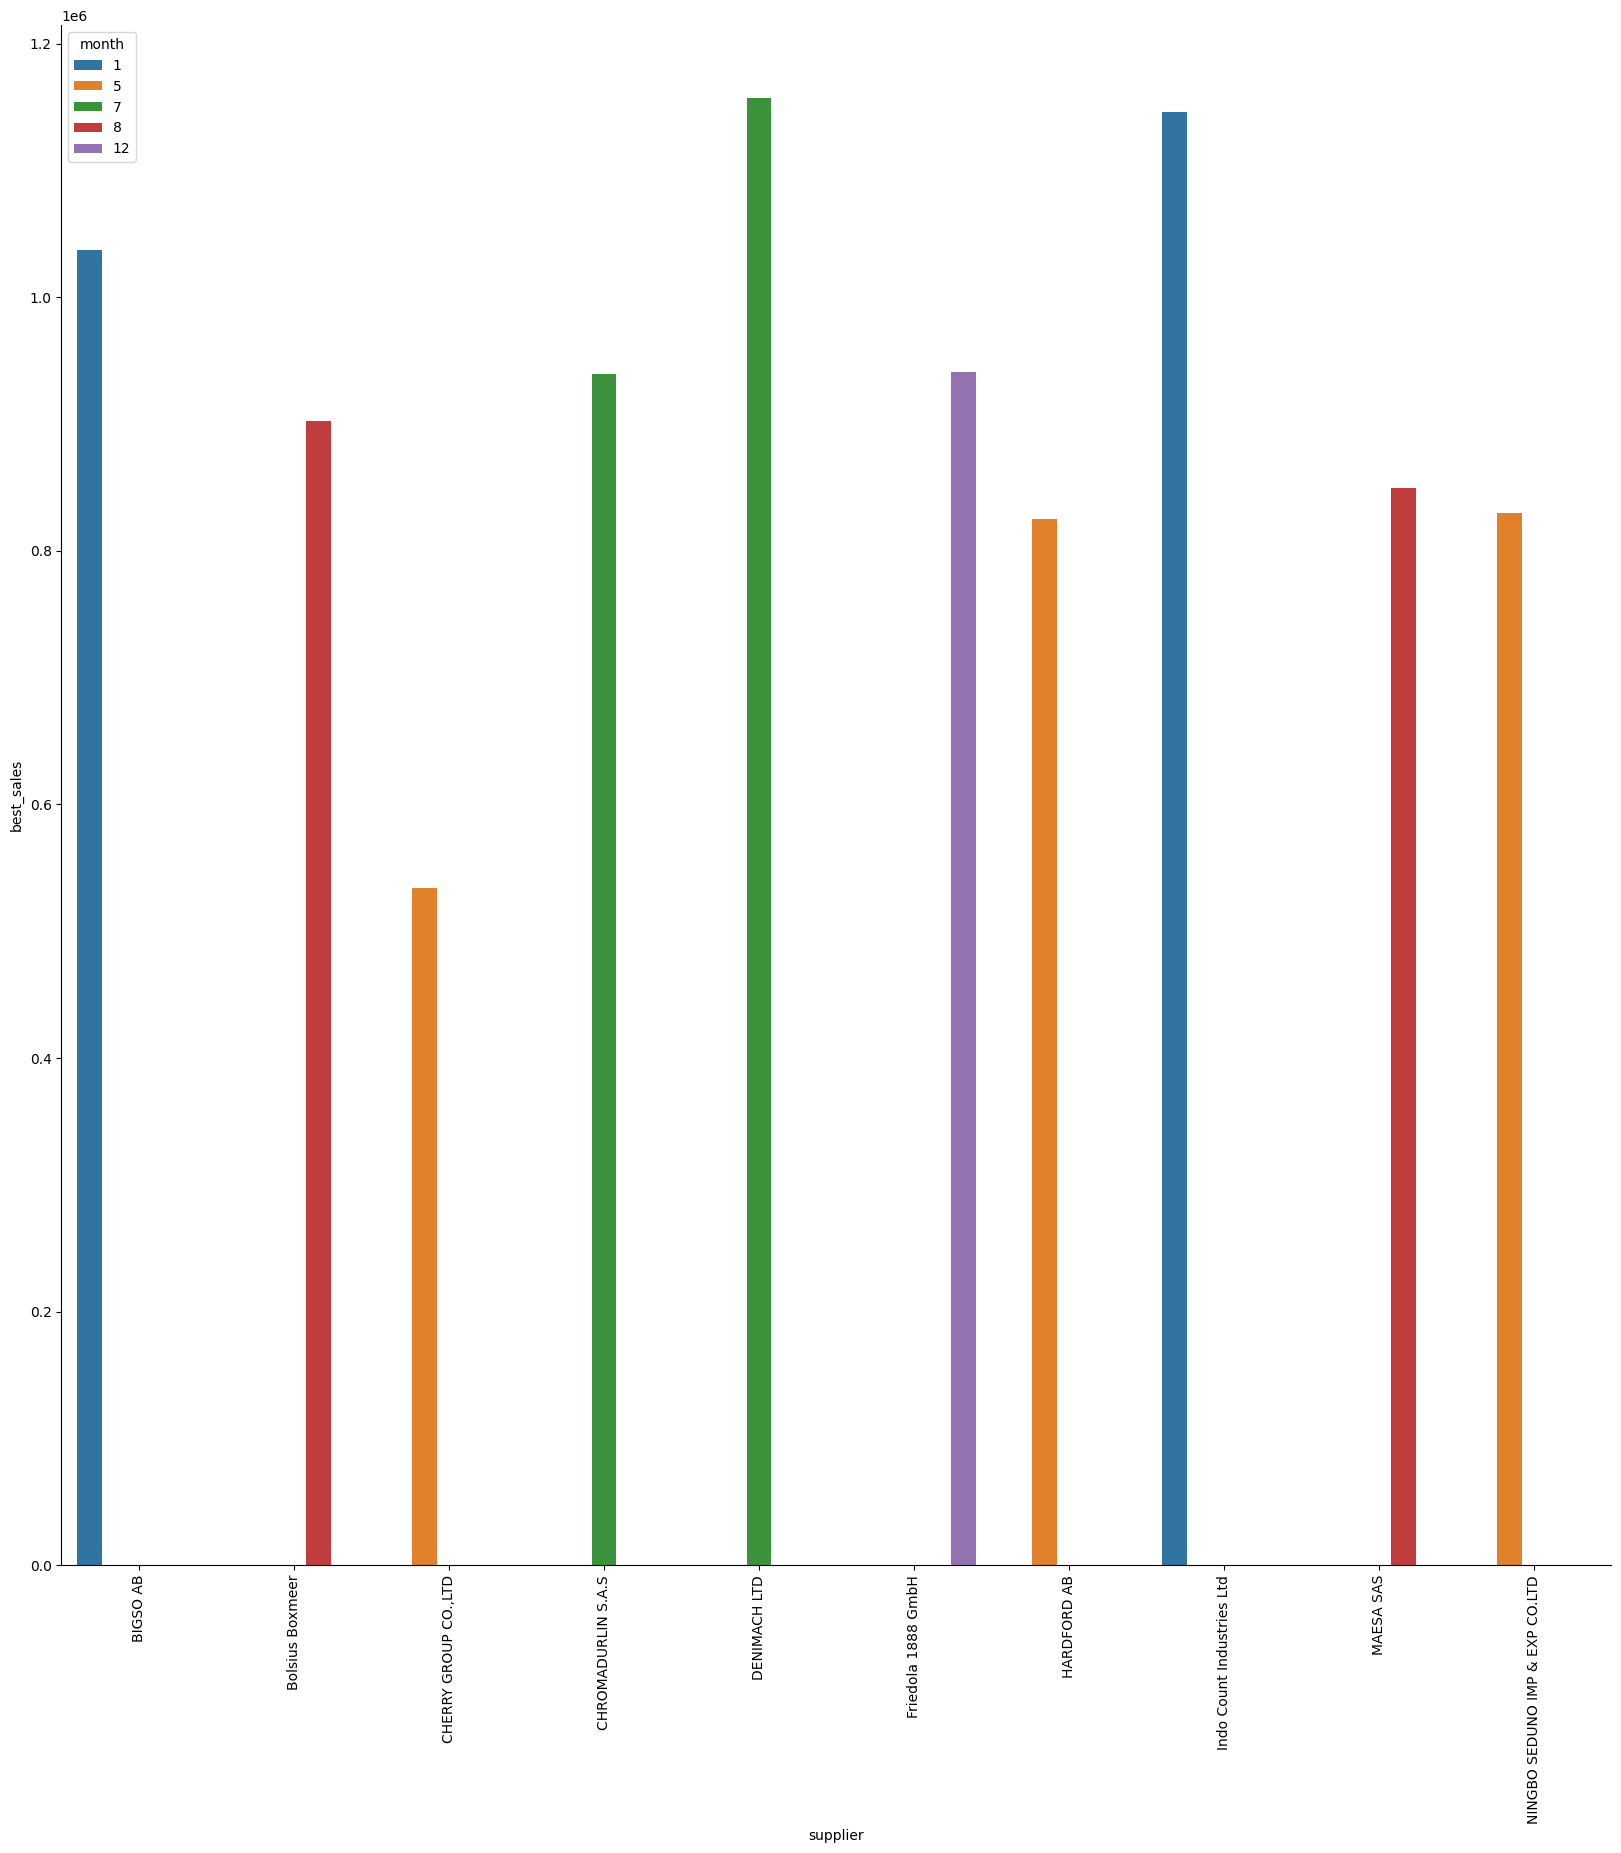

In [41]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=90)
sns.barplot(x=df_qa['supplier'], y=df_qa['best_sales'], hue=df_qa['month'], ax=ax)
sns.despine(fig)

# Analysis 4.1: 